# Data Cleaning/Preprocessing

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verify if the dataset is encoded as UTF-8 format
import chardet

# Read the file as bytes
with open("/content/drive/My Drive/Mcgill-ML 1/Group project/DataCoSupplyChainDataset.csv", "rb") as f:
    result = chardet.detect(f.read(10000))

# Show the encoding
print(result)

# Load Dataset
data = pd.read_csv("/content/drive/My Drive/Mcgill-ML 1/Group project/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


**Notes:** The file is encoded as 'ISO-8859-1'. Therefore we need to specify the encoding when loading the dataset.

In [4]:
#Load Dataset
#data = pd.read_csv("C:/Users/lilia/OneDrive/Desktop/lilianapgarciac/LILIANA GARCÍA/2024/MMA - Canada Dream/MMA/MGSC661/supply_chain_analytics/Dataset/Dataset/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

In [5]:
#Verify the first five rows of the dataset
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [6]:
#Verify the data structure for correct data types and missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Notes:** As we can observe, there is a row ('Product Description') with '0' entries, we will proceed to confirm for other missing values and remove it.

In [7]:
#Check for missing values
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Id                              0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Profit Per Order                0
Order Region                          0
Order State                           0
Order Status                          0
Order Zipcode                    155679
Product Card Id                       0
Product Category Id                   0
Product Description              180519
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0
shipping date (DateOrders)            0
Shipping Mode                         0
dtype: int64

In [8]:
#Remove 'Product Description' column (all values missing)
data = data.drop(columns=["Product Description"])

#Remove 'Order Zipcode' column (high missing values)
data = data.drop(columns=["Order Zipcode"])

#Verify if the rest of the missing values are significant
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status                     0
Product Card Id                  0
Product Category Id              0
Product Image                    0
Product Name                     0
Product Price                    0
Product Status                   0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

In [9]:
#Remove columns that are not necessary for the model

#Customer First Name
data = data.drop(columns=["Customer Fname"])

#Customer Last Name
data = data.drop(columns=["Customer Lname"])

#Customer Email
data = data.drop(columns=["Customer Email"])

#Customer Password
data = data.drop(columns=["Customer Password"])

#Product Image
data = data.drop(columns=["Product Image"])

#Visualize the first 5 rows of the dataset
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

     Order Region      Order State     Order Status Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE            1360   
1      South Asia         Rajastán          PENDING            1360   
2      South Asia         Rajastán           CLOSED            1360   
3         Oceania       Queensland         COMPLETE            1360   
4         Oceania       Queensland  PENDING_PAYMENT            1360   

  Product Category Id  Product Name  Product Price Product Status  \
0                  73  Smart watch          327.75              0   
1                  73  Smart watch          327.75              0   
2                  73  Smart watch          327.75              0   
3                  73  Smart watch          327.75              0   
4                  73  Smart watch          327.75              0   

   shipping date (DateOrders)   Shipping Mode  
0              2/3/2018 22:56  Standard Class  
1             1/18/2018 12:27  Standard Class  
2             1/17/2018 12:06  Standard Class  
3             1/16/2018 11:45  Standard Class  
4             1/15/2018 11:24  Standard Class  

[5 rows x 46 columns]

In [10]:
#Remove ID columns

#Category ID
data = data.drop(columns=["Category Id"])

#Customer ID
data = data.drop(columns=["Customer Id"])

#Department ID
data = data.drop(columns=["Department Id"])

#Order ID
data = data.drop(columns=["Order Id"])

#Order Customer ID
data = data.drop(columns=["Order Customer Id"])

#Order Item ID
data = data.drop(columns=["Order Item Id"])

#Order Item Cardprod ID
data = data.drop(columns=["Order Item Cardprod Id"])

#Product Card ID
data = data.drop(columns=["Product Card Id"])

#Product Category ID
data = data.drop(columns=["Product Category Id"])

In [11]:
#Remove Zipcodes, longitudes, and latitudes - not relevant to our model
data = data.drop(columns=["Customer Zipcode", "Latitude", "Longitude"])


In [12]:
#Remove street information - not relevant to our model
data = data.drop(columns=["Customer Street"])

**Notes:** Since we have columns with date information but their data type is 'object', we need to convert it fo datetime data type.

In [13]:
#Convert features that represent date and time to datetime data type
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

#Handle the time and date variables (Separate them)
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [14]:
#Remove original 'object' type date features.
data = data.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"])

In [15]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  \
0                   0  Sporting Goods        Caguas      Puerto Rico   
1                   1  Sporting Goods        Caguas      Puerto Rico   
2                   0  Sporting Goods      San Jose          EE. UU.   
3                   0  Sporting Goods   Los Angeles          EE. UU.   
4                   0  Sporting Goods        Caguas      Puerto Rico   

  Customer Segment Customer State Department Name        Market  Order City  \
0         Consumer             PR         Fitness  Pacific Asia      Bekasi   
1         Consumer             PR         Fitness  Pacific Asia     Bikaner   
2         Consumer             CA         Fitness  Pacific Asia     Bikaner   
3      Home Office             CA         Fitness  Pacific Asia  Townsville   
4        Corporate             PR         Fitness  Pacific Asia  Townsville   

  Order Country  Order Item Discount  Order Item Discount Rate  \
0     Indonesia            13.110000                      0.04   
1         India            16.389999                      0.05   
2         India            18.030001                      0.06   
3     Australia            22.940001                      0.07   
4     Australia            29.500000                      0.09   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   
2                    327.75                    -0.80                    1   
3                    327.75                     0.08                    1   
4                    327.75                     0.45                    1   

    Sales  Order Item Total  Order Profit Per Order    Order Region  \
0  327.75        314.640015               91.250000  Southeast Asia   
1  327.75        311.359985             -249.089996      South Asia   
2  327.75        309.720001             -247.779999      South Asia   
3  327.75        304.809998               22.860001         Oceania   
4  327.75        298.250000              134.210007         Oceania   

       Order State     Order Status  Product Name  Product Price  \
0  Java Occidental         COMPLETE  Smart watch          327.75   
1         Rajastán          PENDING  Smart watch          327.75   
2         Rajastán           CLOSED  Smart watch          327.75   
3       Queensland         COMPLETE  Smart watch          327.75   
4       Queensland  PENDING_PAYMENT  Smart watch          327.75   

   Product Status   Shipping Mode          order_date       shipping_date  \
0               0  Standard Class 2018-01-31 22:56:00 2018-02-03 22:56:00   
1               0  Standard Class 2018-01-13 12:27:00 2018-01-18 12:27:00   
2               0  Standard Class 2018-01-13 12:06:00 2018-01-17 12:06:00   
3               0  Standard Class 2018-01-13 11:45:00 2018-01-16 11:45:00   
4               0  Standard Class 2018-01-13 11:24:00 2018-01-15 11:24:00   

   order_year  order_month  order_day  shipping_year  shipping_month  \
0        2018            1         31           2018          

# EDA: General

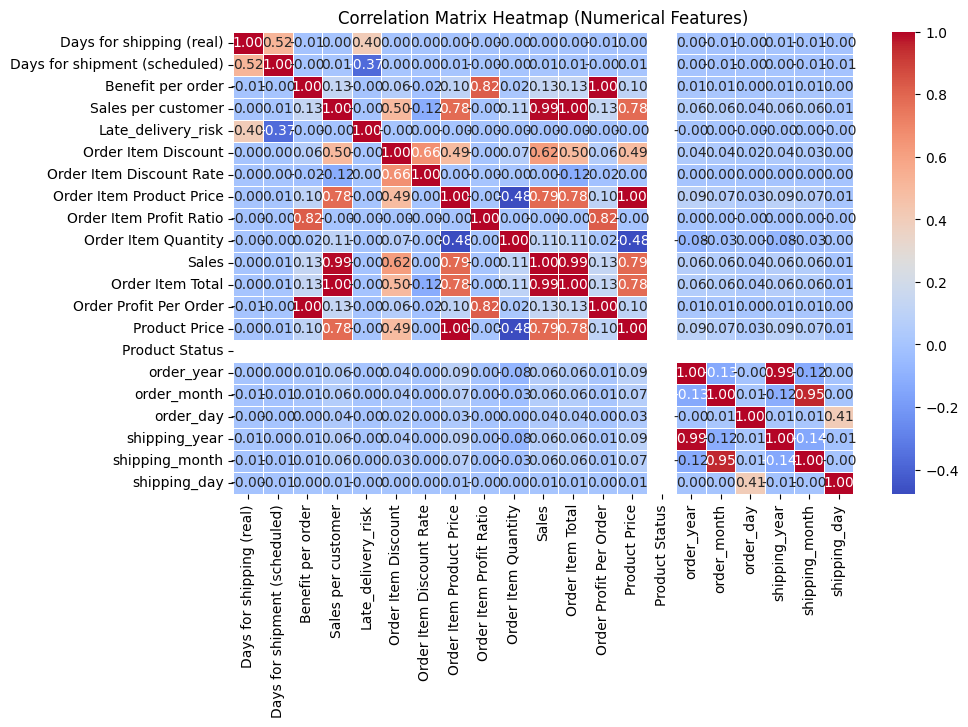

In [16]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

**Notes:** As we can observe in the correlation matrix, there is a problem that the 'Product Status' feature has no values. All inputs are '0'. Therefore, we proceed to remove it from the dataset.

In [17]:
#Drop Product Status (all values are '0')
data = data.drop(columns=["Product Status"])

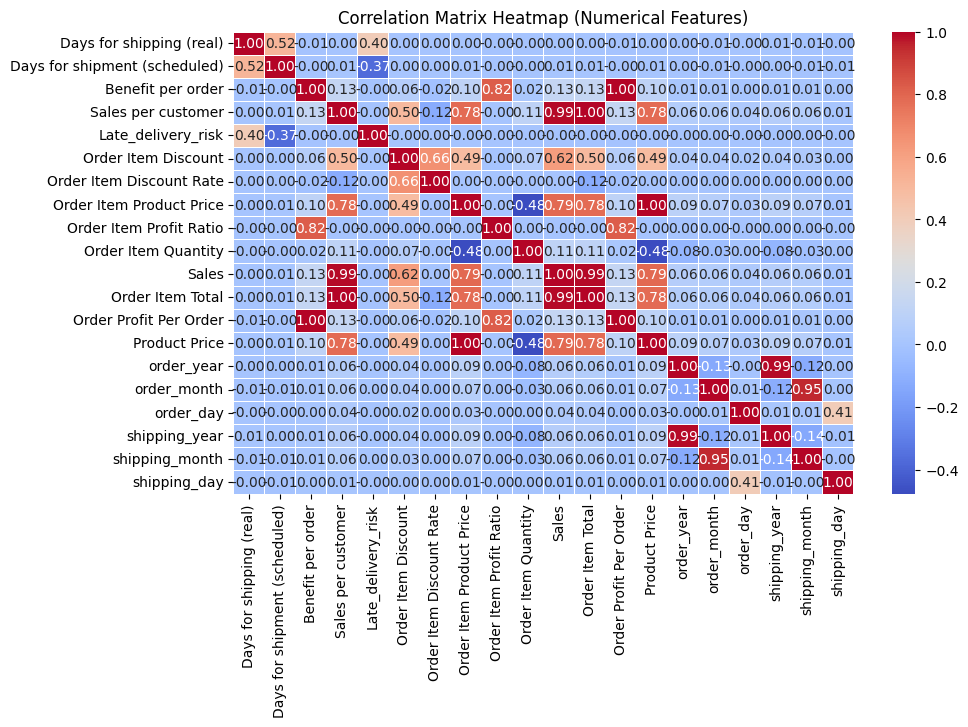

In [18]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [19]:
#Identify highly correlated features

#Correlation matrix using abs to consider both positive and negative correlations
correlation_matrix = num_data.corr().abs()

#Threshold
threshold = 0.8

#Extract feature pairs with high correlation
high_corr_features = set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
            high_corr_features.add(col1)
            high_corr_features.add(col2)

#Print the names of the highly correlated features
print("Highly correlated features:")
print(high_corr_features)


Highly correlated features:
{'shipping_year', 'Order Profit Per Order', 'order_year', 'Sales', 'order_month', 'Order Item Total', 'Order Item Product Price', 'Sales per customer', 'Order Item Profit Ratio', 'Benefit per order', 'shipping_month', 'Product Price'}


**Notes:** As we can observe from the correlation matrix and the list of the highly correlated features, there is high correlation between 'Product Price' and 'Order Item Product Price'. To avoid multicollinearity or redundancy in the data, we will remove the 'Order Item Product Price' column.

Additionally, we are working with analyzing the causes of delay, where shipping information is prioritized when compared to the order information. In real life, we assume that the products are being ordered and shipped in the same year, unless it is ordered in the last week of the year, where it will shipped at the beginning of the following year. Therefore, to avoid multicollinearity, we will remove the 'order year' column. The same applies for month, we will remove the 'order month' column.

Moreover, the 'sales' and 'order item total' columns are correlated and both has the same values. Therefore, we will remove the 'sales' column. It also applies for 'sales per customer' and 'order item total'. Since we are not analyzing from the business side, we will remove the 'sales per customer' column. The same applies for 'order item profit ratio' and 'benefit per order', we will remove the 'benefit per order' column.

In [20]:
#Remove 'Order Item Product Price' column
data = data.drop(columns=["Order Item Product Price"])

In [21]:
#Remove 'order Year', 'order Month' column
data = data.drop(columns=["order_year", "order_month"])

In [22]:
#Remove 'Sales' column
data = data.drop(columns=["Sales"])

In [23]:
#Remove 'Sales per customer' column
data = data.drop(columns=["Sales per customer"])

In [24]:
#Remove 'Benefit per order' column
data = data.drop(columns=["Benefit per order"])

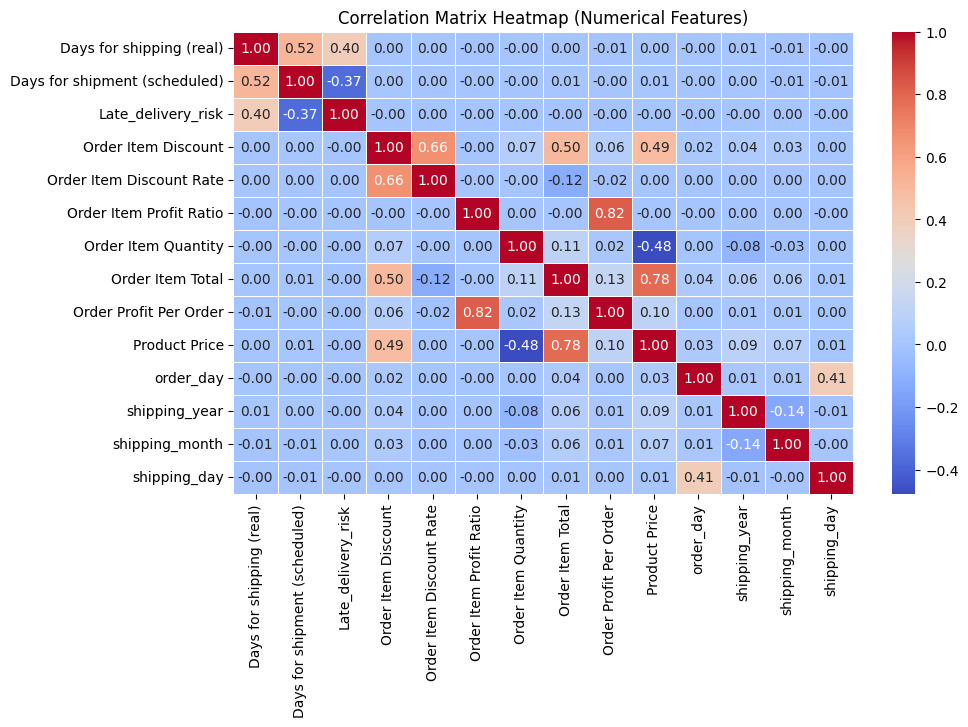

In [25]:
#Latest version of the Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [26]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

    Delivery Status  Late_delivery_risk   Category Name Customer City  \
0  Advance shipping                   0  Sporting Goods        Caguas   
1     Late delivery                   1  Sporting Goods        Caguas   
2  Shipping on time                   0  Sporting Goods      San Jose   
3  Advance shipping                   0  Sporting Goods   Los Angeles   
4  Advance shipping                   0  Sporting Goods        Caguas   

  Customer Country Customer Segment Customer State Department Name  \
0      Puerto Rico         Consumer             PR         Fitness   
1      Puerto Rico         Consumer             PR         Fitness   
2          EE. UU.         Consumer             CA         Fitness   
3          EE. UU.      Home Office             CA         Fitness   
4      Puerto Rico        Corporate             PR         Fitness   

         Market  Order City Order Country  Order Item Discount  \
0  Pacific Asia      Bekasi     Indonesia            13.110000   
1  Pacific Asia     Bikaner         India            16.389999   
2  Pacific Asia     Bikaner         India            18.030001   
3  Pacific Asia  Townsville     Australia            22.940001   
4  Pacific Asia  Townsville     Australia            29.500000   

   Order Item Discount Rate  Order Item Profit Ratio  Order Item Quantity  \
0                      0.04                     0.29                    1   
1                      0.05                    -0.80                    1   
2                      0.06                    -0.80                    1   
3                      0.07                     0.08                    1   
4                      0.09                     0.45                    1   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0        314.640015               91.250000  Southeast Asia  Java Occidental   
1        311.359985             -249.089996      South Asia         Rajastán   
2        309.720001             -247.779999      South Asia         Rajastán   
3        304.809998               22.860001         Oceania       Queensland   
4        298.250000              134.210007         Oceania       Queensland   

      Order Status  Product Name  Product Price   Shipping Mode  \
0         COMPLETE  Smart watch          327.75  Standard Class   
1          PENDING  Smart watch          327.75  Standard Class   
2           CLOSED  Smart watch          327.75  Standard Class   
3         COMPLETE  Smart watch          327.75  Standard Class   
4  PENDING_PAYMENT  Smart watch          327.75  Standard Class   

           order_date       shipping_date  order_day  shipping_year  \
0 2018-01-31 22:56:00 2018-02-03 22:56:00         31           2018   
1 2018-01-13 12:27:00 2018-01-18 12:27:00         13           2018   
2 2018-01-13 12:06:00 2018-01-17 12:06:00         13           2018   
3 2018-01-13 11:45:00 2018-01-16 11:45:00         13           2018   
4 2018-01-13 11:24:00 2018-01-15 11:24:00         13           2018   

   shipping_month  shipping_day  
0               2             3  
1               1            18  
2               1            17  
3               1            16  
4               1            15

**Notes:** The 'Days for shipping (real)' column shows the difference between shipping date and order date.

In [27]:
#Confirm that the target variable 'late_delivery_risk' has only 0 and 1 values
data['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

**Notes:** We need to detect if the numerical features in the dataset contains any outliers. Therefore, we are using boxplots to visualize the distribution and identify outliers.

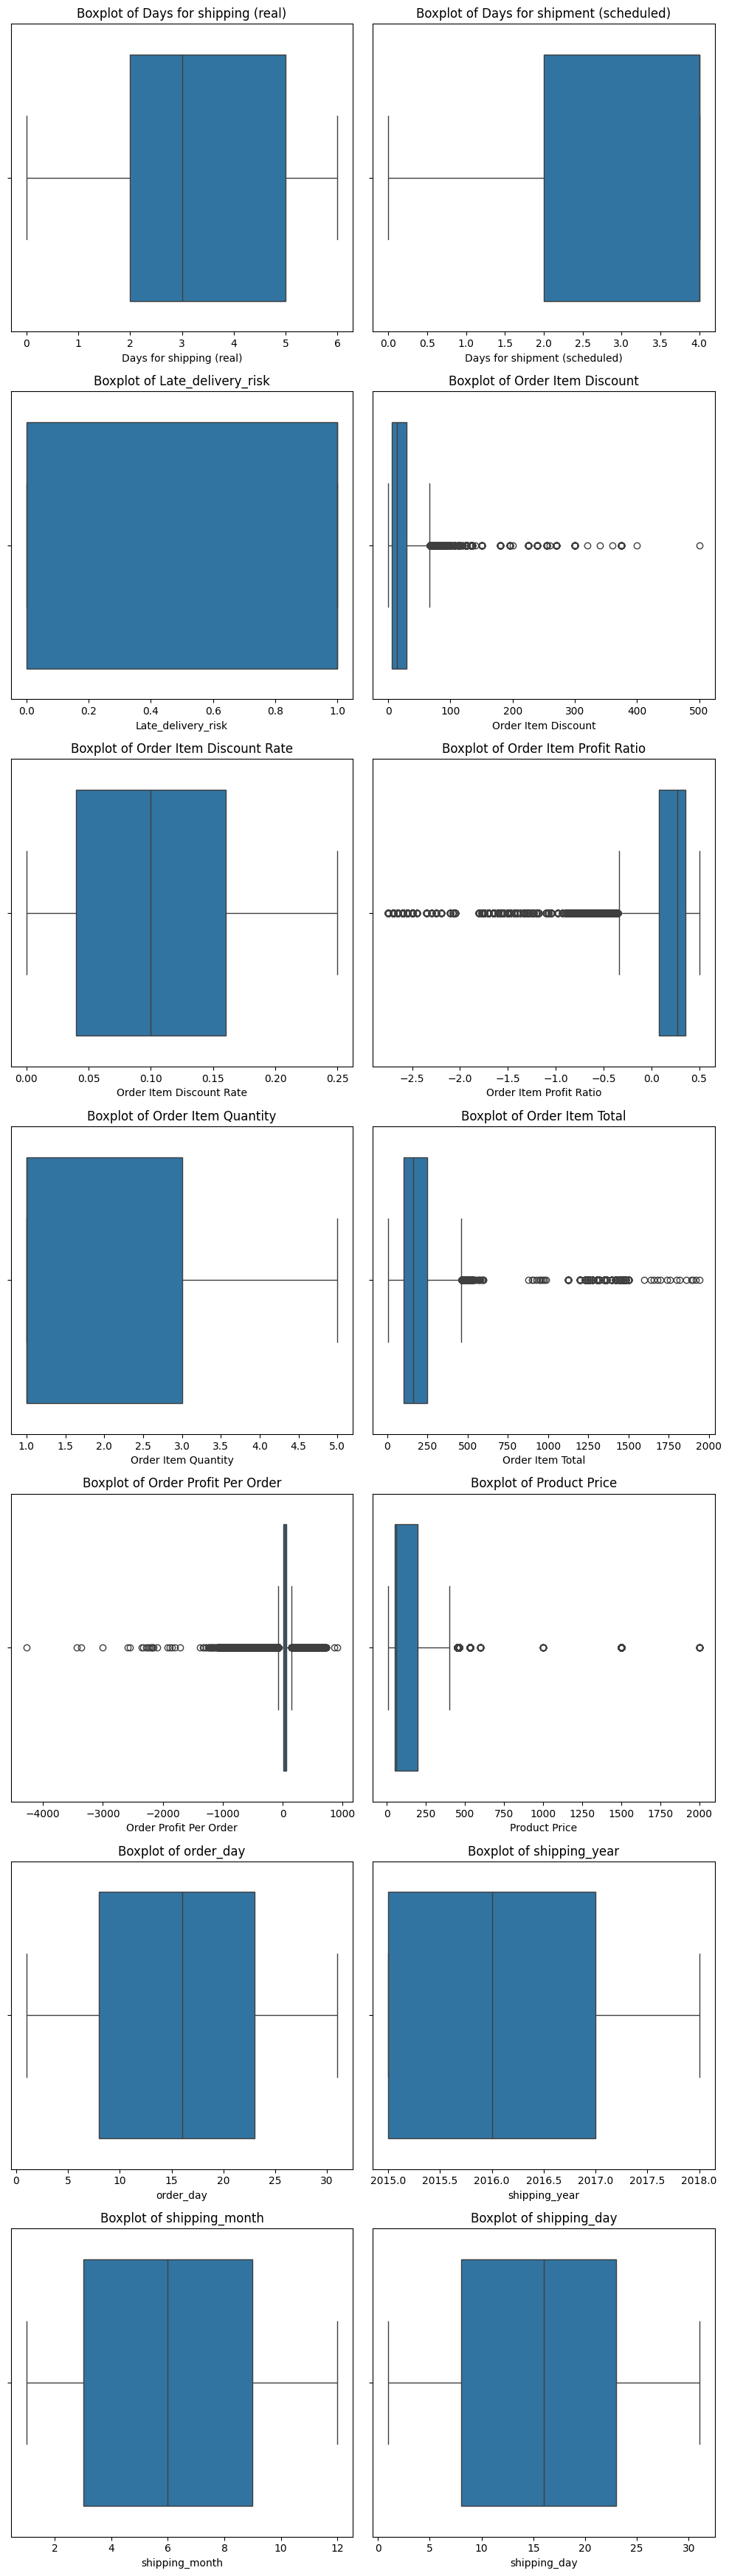

In [28]:
#Boxplot

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, column in enumerate(num_data.columns):
    sns.boxplot(data=num_data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Notes:** There are many visible outliers for our some of the numerical features, but mainly for 'Order Profit per Order'. We will proceed to remove them.

In [29]:
#Create a copy of the dataframe to avoid modifying the original one
data_cleaned = data.copy()

#Loop through each numerical column to remove outliers
for column in num_data.columns:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    #Define the lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Remove rows that have values outside the lower and upper bounds
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

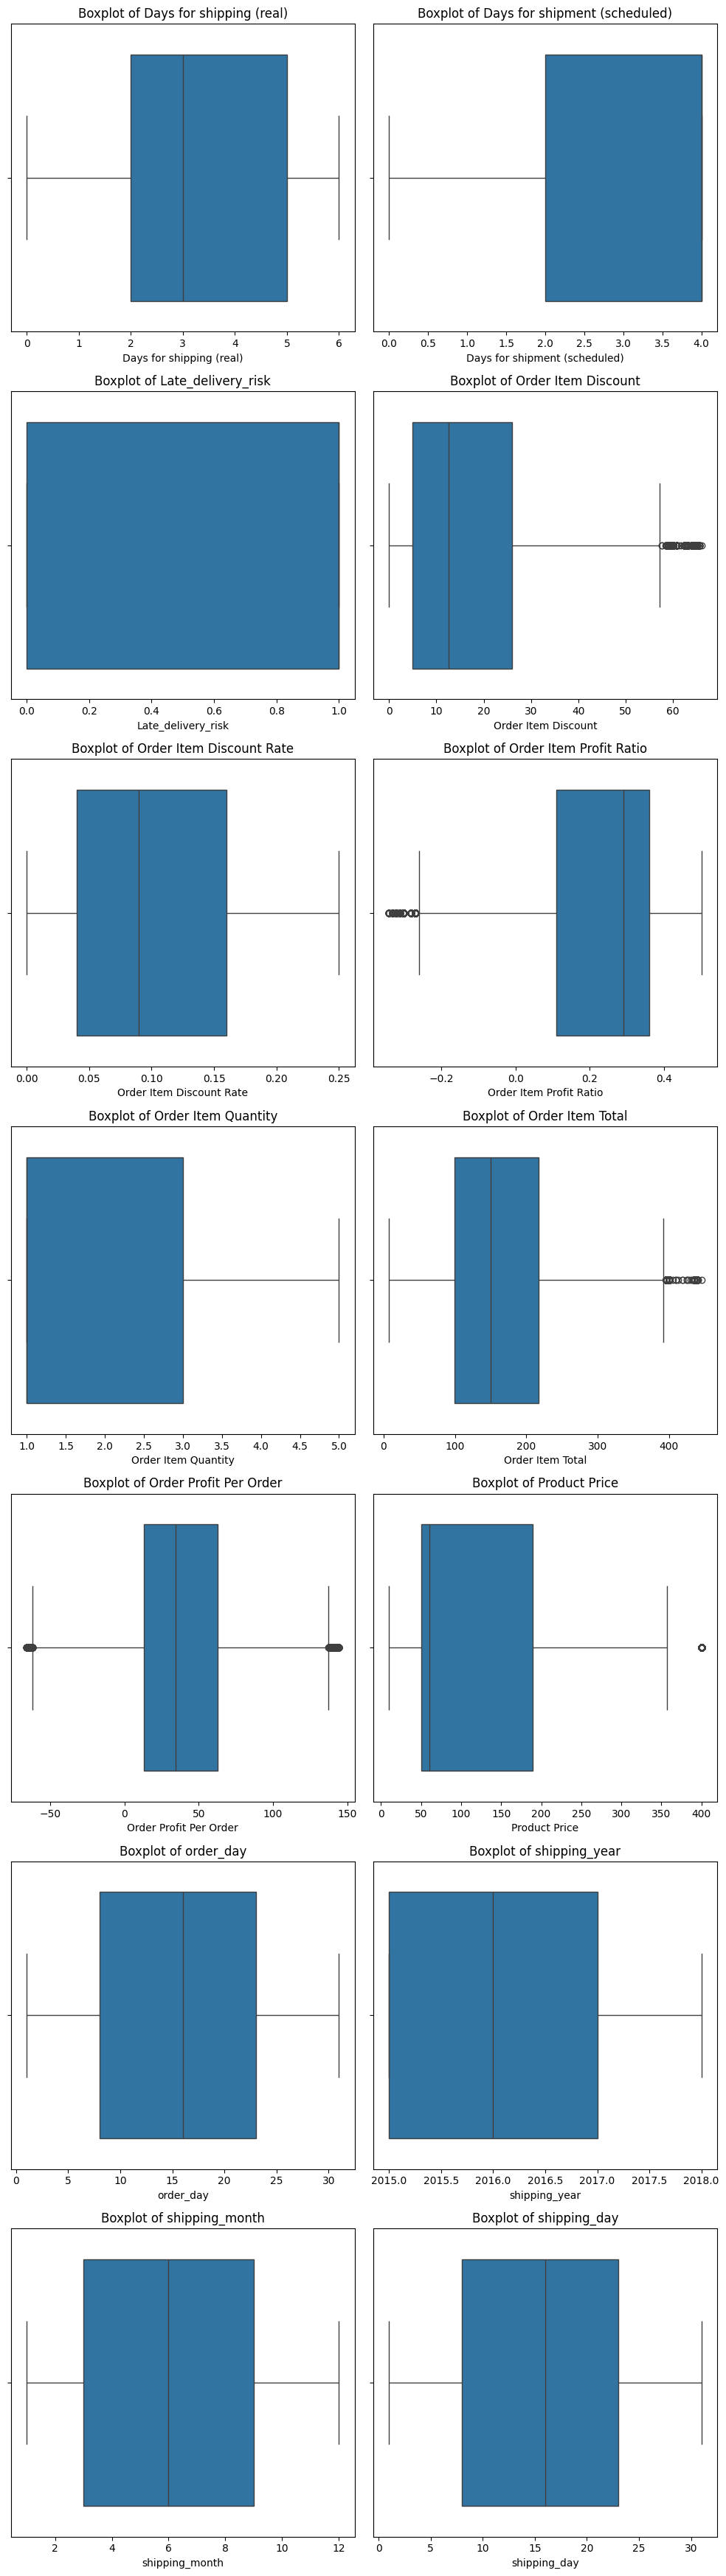

In [30]:
#Boxplots after removing the outliers

#Select only numerical columns
num_data_cleaned = data_cleaned.select_dtypes(include=["number"])

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data_cleaned.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

#Flatten the axes array for easy indexing
axes = axes.flatten()

#Loop through the numerical columns and plot them
for i, column in enumerate(num_data_cleaned.columns):
    sns.boxplot(data=num_data_cleaned, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Notes:** As we can observe from the visualizations, the majority of the outliers were removed. The boxplots looks reasonable and further outlier removal will be performed when the model performances are not meeting the expectations.

In [31]:
#Visualize first five rows of the cleaned dataset
data_cleaned.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   

     Delivery Status  Late_delivery_risk   Category Name Customer City  \
0   Advance shipping                   0  Sporting Goods        Caguas   
3   Advance shipping                   0  Sporting Goods   Los Angeles   
4   Advance shipping                   0  Sporting Goods        Caguas   
5  Shipping canceled                   0  Sporting Goods     Tonawanda   
6      Late delivery                   1  Sporting Goods        Caguas   

  Customer Country Customer Segment Customer State Department Name  \
0      Puerto Rico         Consumer             PR         Fitness   
3          EE. UU.      Home Office             CA         Fitness   
4      Puerto Rico        Corporate             PR         Fitness   
5          EE. UU.         Consumer             NY         Fitness   
6      Puerto Rico      Home Office             PR         Fitness   

         Market  Order City Order Country  Order Item Discount  \
0  Pacific Asia      Bekasi     Indonesia            13.110000   
3  Pacific Asia  Townsville     Australia            22.940001   
4  Pacific Asia  Townsville     Australia            29.500000   
5  Pacific Asia   Toowoomba     Australia            32.779999   
6  Pacific Asia   Guangzhou         China            39.330002   

   Order Item Discount Rate  Order Item Profit Ratio  Order Item Quantity  \
0                      0.04                     0.29                    1   
3                      0.07                     0.08                    1   
4                      0.09                     0.45                    1   
5                      0.10                     0.06                    1   
6                      0.12                     0.33                    1   

   Order Item Total  Order Profit Per Order    Order Region      Order State  \
0        314.640015               91.250000  Southeast Asia  Java Occidental   
3        304.809998               22.860001         Oceania       Queensland   
4        298.250000              134.210007         Oceania       Queensland   
5        294.980011               18.580000         Oceania       Queensland   
6        288.420013               95.180000    Eastern Asia        Guangdong   

      Order Status  Product Name  Product Price   Shipping Mode  \
0         COMPLETE  Smart watch          327.75  Standard Class   
3         COMPLETE  Smart watch          327.75  Standard Class   
4  PENDING_PAYMENT  Smart watch          327.75  Standard Class   
5         CANCELED  Smart watch          327.75  Standard Class   
6         COMPLETE  Smart watch          327.75     First Class   

           order_date       shipping_date  order_day  shipping_year  \
0 2018-01-31 22:56:00 2018-02-03 22:56:00         31           2018   
3 2018-01-13 11:45:00 2018-01-16 11:45:00         13           2018   
4 2018-01-13 11:24:00 2018-01-15 11:24:00         13           2018   
5 2018-01-13 11:03:00 2018-01-19 11:03:00         13           2018   
6 2018-01-13 10:42:00 2018-01-15 10:42:00         13           2018   

   shipping_month  shipping_day  
0               2             3  
3               1            16  
4               1            15  
5               1            19  
6               1            15

**Notes:** Please use the 'data_cleaned' dataframe/dataset to proceed with the next steps.

# EDA: Group (Late Delivery Risk) Comparison

#### Let's see if we find any difference between the orders with late delivery risk vs orders with no late delivery risk per each NUMERICAL variable.

To do this let's plot some violin plots which give us insight about distribution comparison. Violin plots can highlight differences and similarities between distributions.

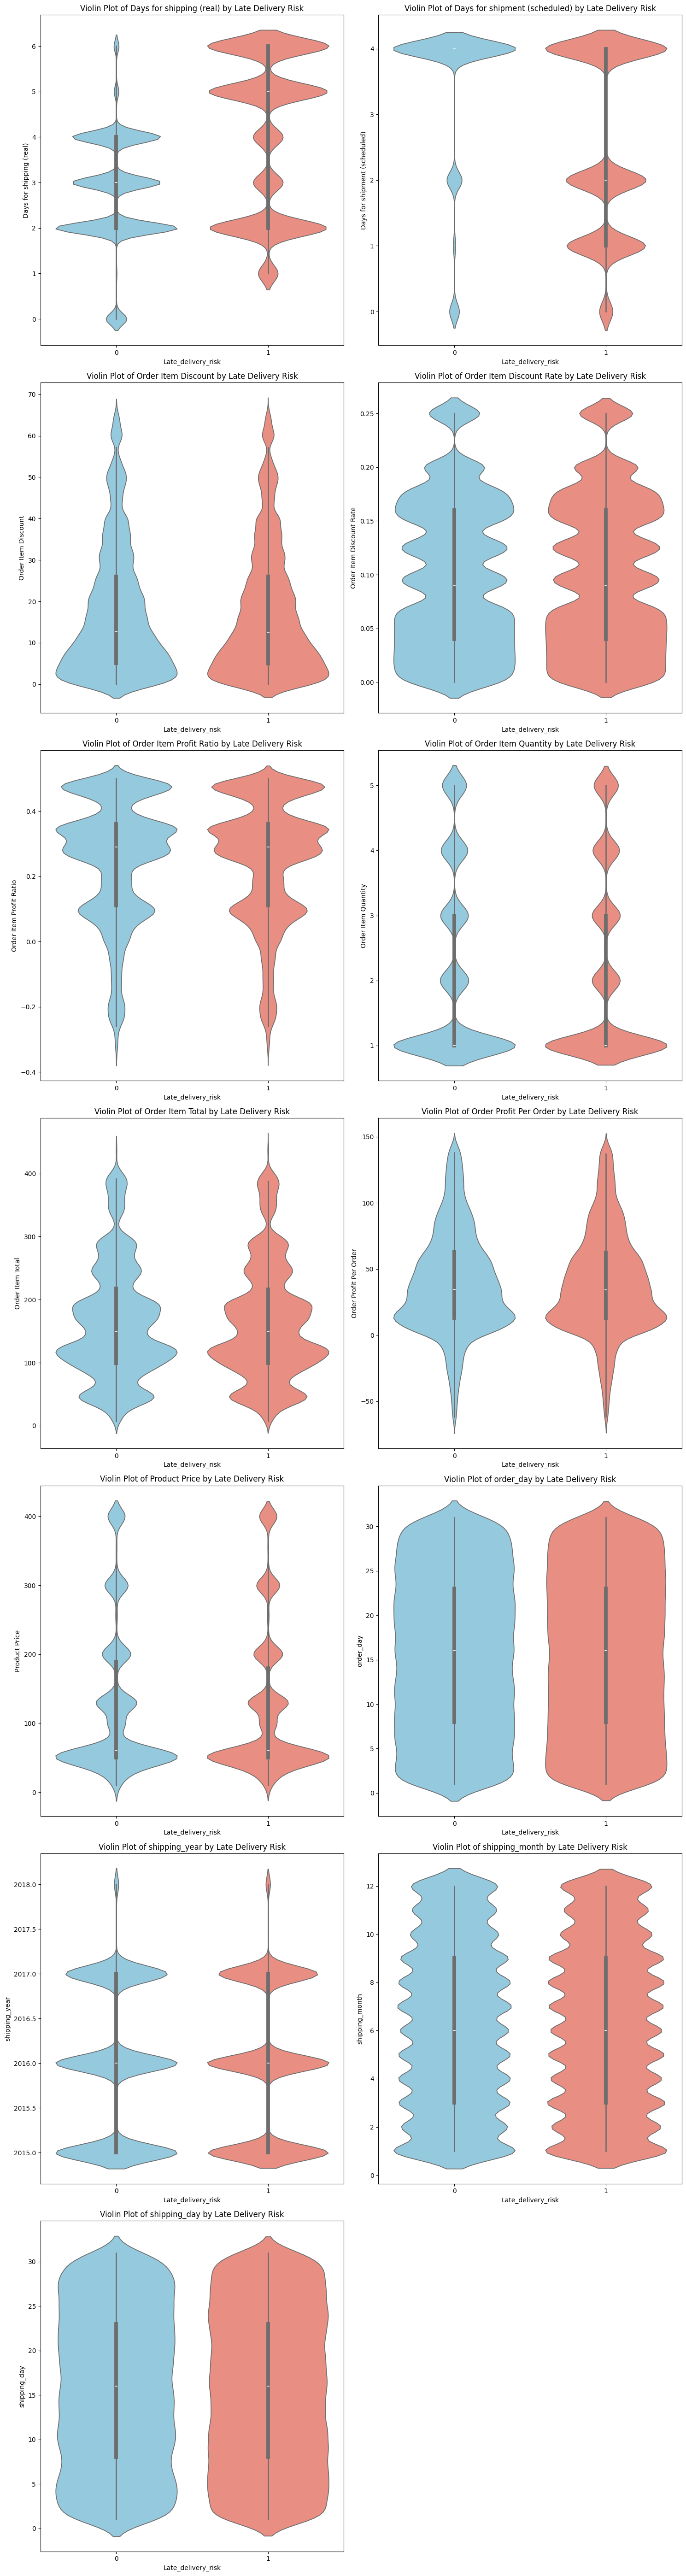

In [32]:
# Exclude the grouping column from the numerical columns to be plotted
plot_columns = [col for col in num_data_cleaned.columns if col != 'Late_delivery_risk']

# Define a custom color palette for the groups
custom_palette = {0: 'skyblue', 1: 'salmon'}

# Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(plot_columns) + n_cols - 1) // n_cols

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through the numerical columns and create a violin plot with custom colors per group
for i, column in enumerate(plot_columns):
    sns.violinplot(
        data=num_data_cleaned,
        x='Late_delivery_risk',
        y=column,
        hue='Late_delivery_risk',        # Assign grouping variable to hue
        palette=custom_palette,
        legend=False,                     # Disable legend to avoid duplicate info
        ax=axes[i]
    )
    axes[i].set_title(f'Violin Plot of {column} by Late Delivery Risk')

# Remove any extra subplots if there are more axes than plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


It seems like the days of shipment scheduled and the real are showing differences in the distribution. Those orders with 1 and 2 days of shipment (scheduled) are more likely to be delayed. Also, those orders that were delivered in 5 and 6 days tend have more chances to be a late delivery.

#### Let's see if we find any difference between the orders with late delivery risk vs orders with no late delivery risk per each CATEGORICAL variable.

To do this let's plot some bar plots which give us insights about distribution per category by target.

In [33]:
# Assuming df is your DataFrame
data_cleaned['Late_delivery_risk'] = data_cleaned['Late_delivery_risk'].astype(str)
categorical_df = data_cleaned.select_dtypes(include=['object', 'category']).drop(columns=['Customer City', 'Order City', 'Order Country', 'Order State', 'Product Name', 'Category Name'], axis=1)

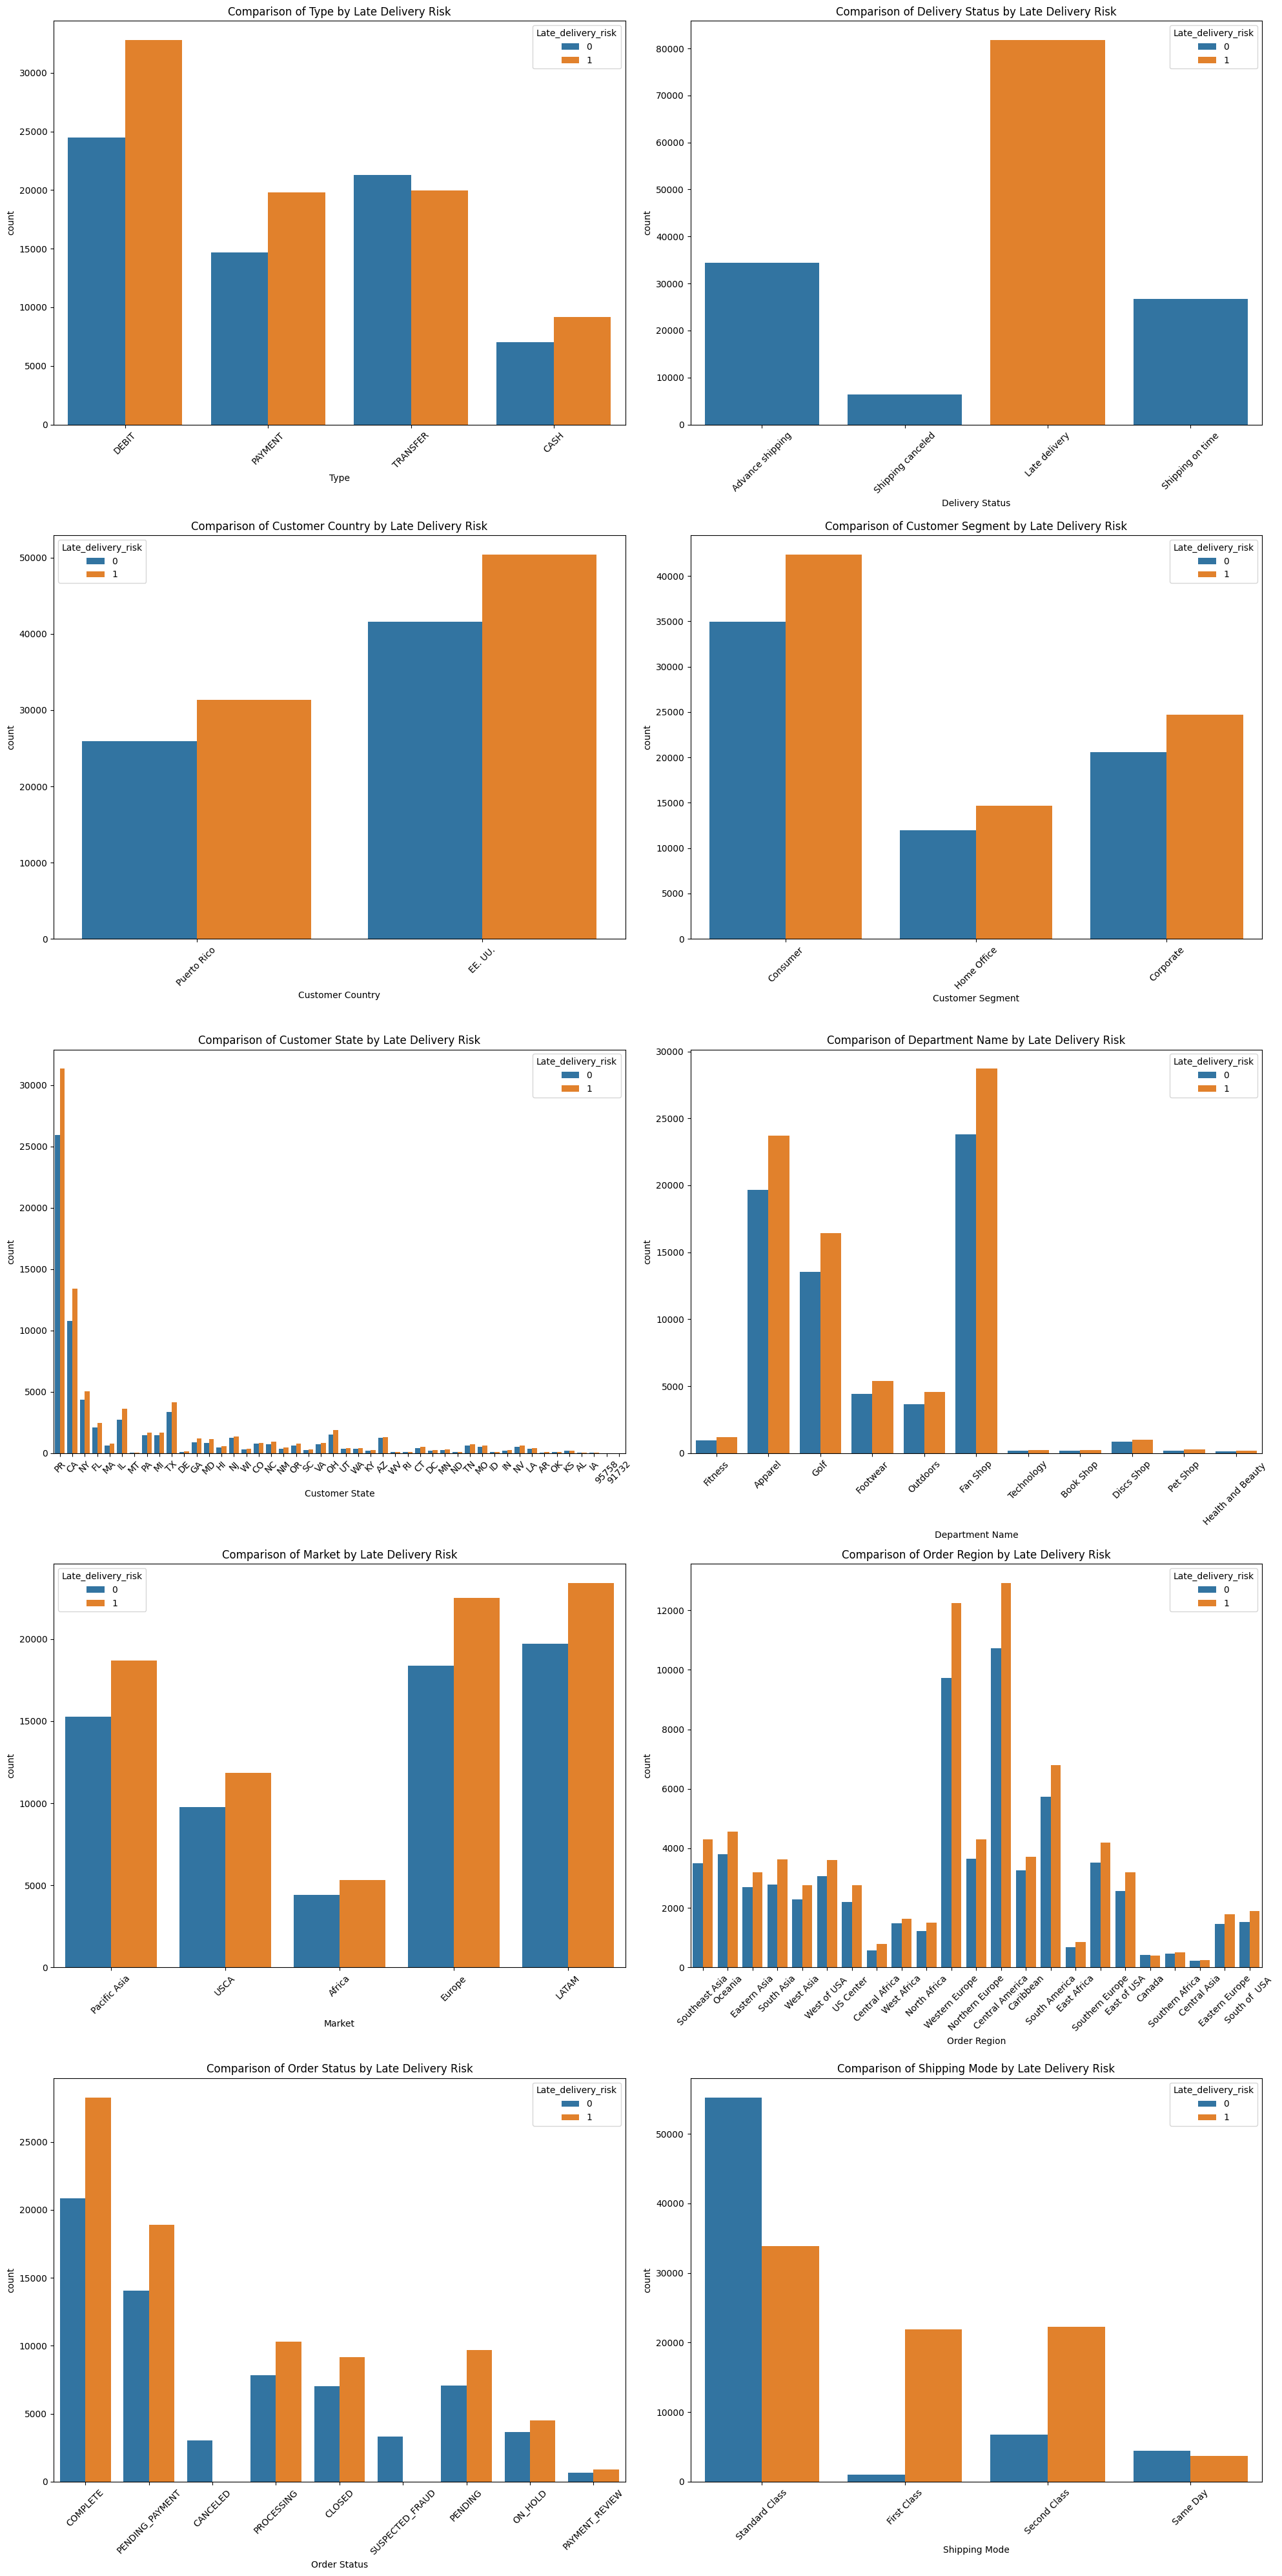

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and it includes the 'Late_delivery_risk' column

# 1. Filter the categorical columns (dtype 'object' or 'category')
categorical_columns = categorical_df.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Remove the grouping variable if it is present in the categorical columns list
if 'Late_delivery_risk' in categorical_columns:
    categorical_columns.remove('Late_delivery_risk')

# 3. Set up the subplot grid (e.g., 2 columns)
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

# 4. Loop through each categorical column and create a bar (count) plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=categorical_df, x=col, hue='Late_delivery_risk', ax=axes[i])
    axes[i].set_title(f'Comparison of {col} by Late Delivery Risk')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# 5. Remove any unused subplots if there are extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [35]:
# Define the grouping variable
group_var = 'Late_delivery_risk'

# Get the list of other categorical variables (exclude the grouping variable)
other_vars = [col for col in categorical_df.columns if col != group_var]

# Dictionary to store the normalized crosstab DataFrames
bivariate_tables = {}

# Loop over each remaining categorical variable and create a normalized crosstab
for var in other_vars:
    # Create a normalized crosstab where rows are Late_delivery_risk and columns are the current variable
    table = pd.crosstab(categorical_df[group_var], categorical_df[var], normalize='index')
    # Save the table with a descriptive key
    bivariate_tables[f"{group_var} vs {var}"] = table

# Display each table as a DataFrame (in a Jupyter Notebook, display() renders nicely)
for key, table in bivariate_tables.items():
    print(f"\nBivariate Table: {key}\n")
    display(table)  # If not in Jupyter, you can use: print(table)



Bivariate Table: Late_delivery_risk vs Type



Type                    CASH     DEBIT   PAYMENT  TRANSFER
Late_delivery_risk                                        
0                   0.104204  0.362943  0.217769  0.315085
1                   0.111978  0.401113  0.242434  0.244476


Bivariate Table: Late_delivery_risk vs Delivery Status



Delivery Status     Advance shipping  Late delivery  Shipping canceled  \
Late_delivery_risk                                                       
0                            0.51022            0.0           0.094339   
1                            0.00000            1.0           0.000000   

Delivery Status     Shipping on time  
Late_delivery_risk                    
0                           0.395441  
1                           0.000000


Bivariate Table: Late_delivery_risk vs Customer Country



Customer Country     EE. UU.  Puerto Rico
Late_delivery_risk                       
0                   0.615728     0.384272
1                   0.616778     0.383222


Bivariate Table: Late_delivery_risk vs Customer Segment



Customer Segment    Consumer  Corporate  Home Office
Late_delivery_risk                                  
0                   0.517256   0.305057     0.177687
1                   0.518153   0.302281     0.179566


Bivariate Table: Late_delivery_risk vs Customer State



Customer State         91732     95758        AL        AR        AZ  \
Late_delivery_risk                                                     
0                   0.000015  0.000015  0.000207  0.000889  0.018115   
1                   0.000000  0.000012  0.000171  0.000880  0.015738   

Customer State            CA        CO        CT        DC        DE  \
Late_delivery_risk                                                     
0                   0.159942  0.011746  0.006043  0.002814  0.001303   
1                   0.164011  0.009966  0.005980  0.003241  0.001529   

Customer State            FL        GA        HI        IA        ID  \
Late_delivery_risk                                                     
0                   0.030750  0.013361  0.006932  0.000370  0.001066   
1                   0.029948  0.014381  0.007019  0.000355  0.000917   

Customer State            IL        IN        KS        KY        LA  \
Late_delivery_risk                                                     
0                   0.040378  0.003022  0.002577  0.002666  0.005347   
1                   0.043950  0.003302  0.002495  0.002800  0.005026   

Customer State            MA        MD        MI        MN        MO  \
Late_delivery_risk                                                     
0                   0.009006  0.012561  0.021507  0.003481  0.007762   
1                   0.009233  0.013782  0.020642  0.003705  0.007349   

Customer State            MT        NC        ND        NJ        NM  \
Late_delivery_risk                                                     
0                   0.000637  0.010680  0.001066  0.018589  0.004932   
1                   0.000391  0.011642  0.001211  0.016814  0.005686   

Customer State            NV        NY        OH        OK        OR  \
Late_delivery_risk                                                     
0                   0.007954  0.064122  0.022589  0.001141  0.009421   
1                   0.007704  0.061889  0.022709  0.001382  0.009269   

Customer State            PA        PR        RI        SC        TN  \
Late_delivery_risk                                                     
0                   0.021596  0.384272  0.001333  0.003555  0.008813   
1                   0.020715  0.383222  0.001333  0.003876  0.008792   

Customer State            TX        UT        VA        WA        WI        WV  
Late_delivery_risk                                                              
0                   0.050006  0.005569  0.010472  0.005125  0.004829  0.001422  
1                   0.050773  0.005185  0.010113  0.005136  0.004366  0.001357


Bivariate Table: Late_delivery_risk vs Department Name



Department Name      Apparel  Book Shop  Discs Shop  Fan Shop   Fitness  \
Late_delivery_risk                                                        
0                   0.291089   0.002326    0.012353  0.352530  0.014190   
1                   0.289685   0.002531    0.012021  0.351073  0.014772   

Department Name     Footwear      Golf  Health and Beauty   Outdoors  \
Late_delivery_risk                                                     
0                   0.065722  0.200453            0.001866  0.054124   
1                   0.065656  0.200648            0.002103  0.055763   

Department Name     Pet Shop  Technology  
Late_delivery_risk                        
0                   0.002651    0.002696  
1                   0.003155    0.002592


Bivariate Table: Late_delivery_risk vs Market



Market                Africa    Europe     LATAM  Pacific Asia      USCA
Late_delivery_risk                                                      
0                   0.065262  0.271952  0.292126      0.226108  0.144552
1                   0.064885  0.275304  0.286273      0.228627  0.144910


Bivariate Table: Late_delivery_risk vs Order Region



Order Region          Canada  Caribbean  Central Africa  Central America  \
Late_delivery_risk                                                         
0                   0.006147   0.048288        0.008473         0.158801   
1                   0.004830   0.045332        0.009734         0.157946   

Order Region        Central Asia  East Africa  East of USA  Eastern Asia  \
Late_delivery_risk                                                         
0                       0.003170     0.009969     0.038141      0.039845   
1                       0.003094     0.010529     0.038997      0.039132   

Order Region        Eastern Europe  North Africa  Northern Europe   Oceania  \
Late_delivery_risk                                                            
0                         0.021670      0.018012         0.054050  0.056464   
1                         0.021889      0.018355         0.052534  0.055702   

Order Region        South America  South Asia  South of  USA   Southeast Asia  \
Late_delivery_risk                                                              
0                        0.085037    0.041119        0.022455        0.051754   
1                        0.082996    0.044268        0.023247        0.052718   

Order Region        Southern Africa  Southern Europe  US Center   West Africa  \
Late_delivery_risk                                                              
0                          0.006888         0.052050    0.032528     0.021922   
1                          0.006310         0.051201    0.033837     0.019957   

Order Region        West Asia  West of USA   Western Europe  
Late_delivery_risk                                           
0                    0.033757      0.045281        0.144182  
1                    0.033714      0.043999        0.149679


Bivariate Table: Late_delivery_risk vs Order Status



Order Status        CANCELED    CLOSED  COMPLETE   ON_HOLD  PAYMENT_REVIEW  \
Late_delivery_risk                                                           
0                   0.044836  0.104204  0.309041  0.053902        0.009909   
1                   0.000000  0.111978  0.345778  0.055335        0.011055   

Order Status         PENDING  PENDING_PAYMENT  PROCESSING  SUSPECTED_FRAUD  
Late_delivery_risk                                                          
0                   0.104781         0.207859    0.115965         0.049502  
1                   0.118569         0.231379    0.125906         0.000000


Bivariate Table: Late_delivery_risk vs Shipping Mode



Shipping Mode       First Class  Same Day  Second Class  Standard Class
Late_delivery_risk                                                     
0                      0.015731  0.065277      0.100412        0.818580
1                      0.267881  0.045258      0.272797        0.414063

Since the City and Country variables has too many categories, making them not very visually appealing and understandable, we consider visualizing the Customer City, Order City and Country by Late Delivery Risk using a geographical visualizations.

In [36]:
import plotly.express as px

# Aggregate data (sum counts per Product Name & Risk Level)
other_variables = data_cleaned.filter(items=['Customer City', 'Order City', 'Order Country', 'Order State', 'Product Name', 'Category Name', 'Late_delivery_risk'])
df_grouped = other_variables.groupby(["Product Name", "Late_delivery_risk"]).size().reset_index(name="count")

# Reduce the number of displayed products (Top 20 by total count)
top_products = df_grouped.groupby("Product Name")["count"].sum().nlargest(20).index
df_grouped = df_grouped[df_grouped["Product Name"].isin(top_products)]

# Compute the ordering of products by total count (descending)
order = df_grouped.groupby("Product Name")["count"].sum().sort_values(ascending=False).index.tolist()

# Create interactive bar chart using Plotly Express with sorted order
import plotly.express as px

fig = px.bar(
    df_grouped,
    x="count",
    y="Product Name",
    color="Late_delivery_risk",
    title="Comparison of Product Name by Late Delivery Risk",
    labels={"count": "Order Count", "Product Name": "Product"},
    orientation="h",  # Horizontal for better readability
    barmode="group",  # Grouped bars
    color_discrete_map={0: "blue", 1: "orange"},
    category_orders={"Product Name": order}  # Set the sorted order for the y-axis
)

# Improve layout
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Product Name",
    legend_title="Late Delivery Risk",
    template="plotly_white",
    height=700
)

fig.show()


In [37]:
# Aggregate data (sum counts per Product Name & Risk Level)
df_grouped = other_variables.groupby(["Category Name", "Late_delivery_risk"]).size().reset_index(name="count")

# Reduce the number of displayed products (Top 20 by total count)
top_products = df_grouped.groupby("Category Name")["count"].sum().nlargest(20).index
df_grouped = df_grouped[df_grouped["Category Name"].isin(top_products)]

# Compute the ordering of products by total count (descending)
order = df_grouped.groupby("Category Name")["count"].sum().sort_values(ascending=False).index.tolist()

# Create interactive bar chart using Plotly Express with sorted order
import plotly.express as px

fig = px.bar(
    df_grouped,
    x="count",
    y="Category Name",
    color="Late_delivery_risk",
    title="Comparison of Category Name by Late Delivery Risk",
    labels={"count": "Order Count", "Category Name": "Product"},
    orientation="h",  # Horizontal for better readability
    barmode="group",  # Grouped bars
    color_discrete_map={0: "blue", 1: "orange"},
    category_orders={"Category Name": order}  # Set the sorted order for the y-axis
)

# Improve layout
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Category Name",
    legend_title="Late Delivery Risk",
    template="plotly_white",
    height=700
)

fig.show()

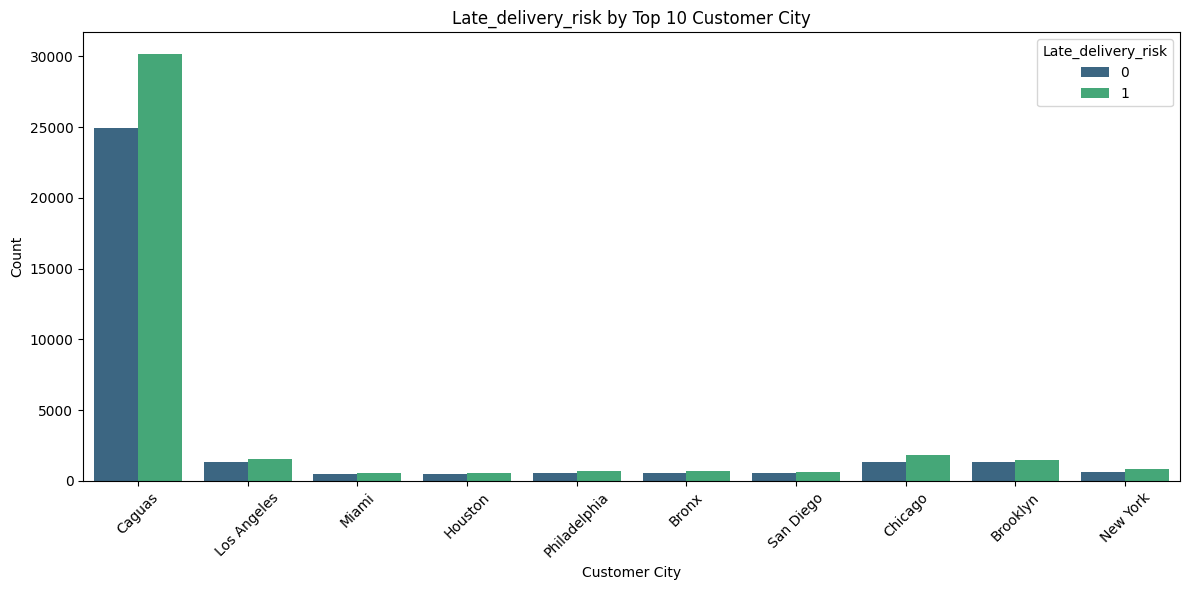

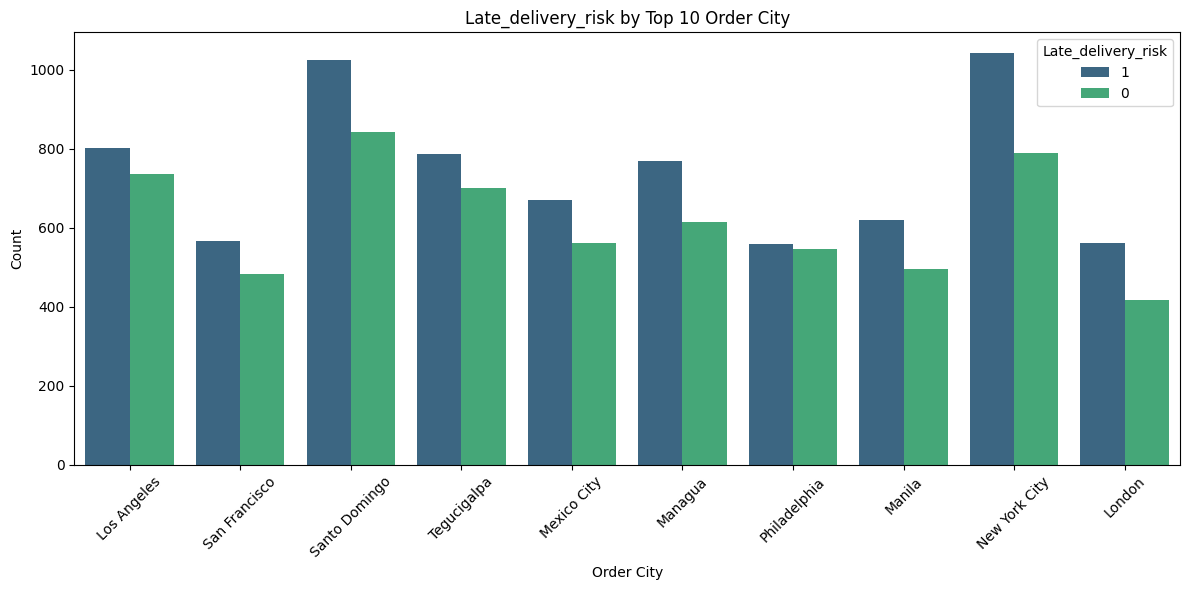

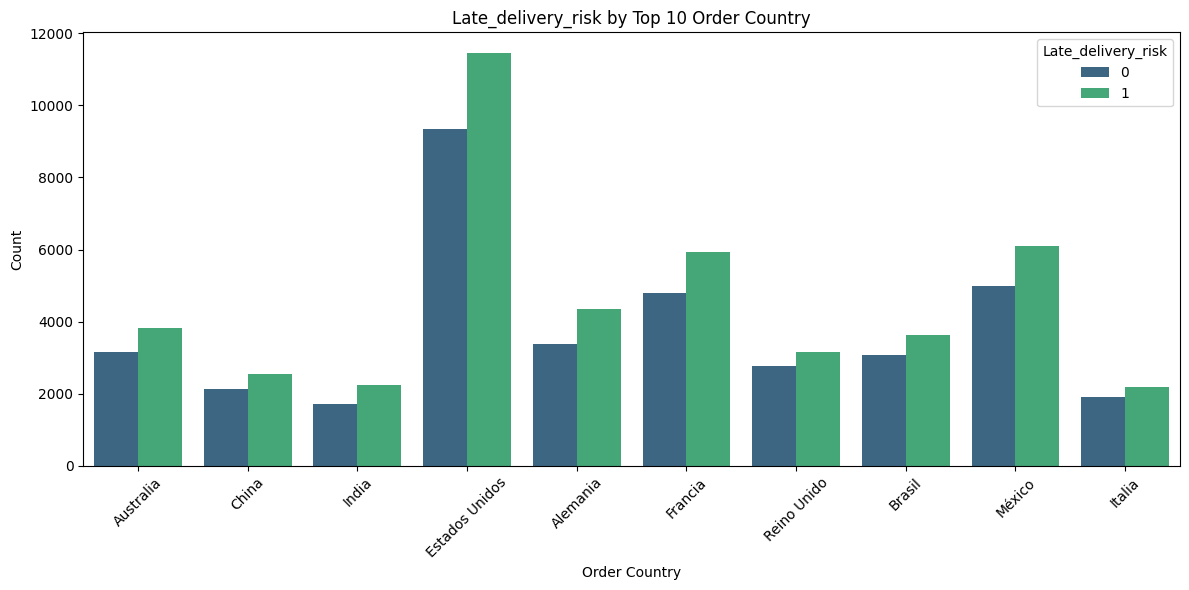

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories(df, category_col, group_col, top_n=10, figsize=(12,6), palette='viridis'):
    """
    Plots a countplot for the top N categories in `category_col` compared by `group_col`.

    Parameters:
      df: DataFrame containing the data.
      category_col: Column name for the categorical variable (e.g., customer_city).
      group_col: Column name for the grouping variable (e.g., Late_delivery_risk).
      top_n: Number of top categories to include.
      figsize: Figure size for the plot.
      palette: Color palette to use.
    """
    # Get the top N categories by frequency
    top_categories = df[category_col].value_counts().nlargest(top_n).index
    df_top = df[df[category_col].isin(top_categories)]

    plt.figure(figsize=figsize)
    sns.countplot(data=df_top, x=category_col, hue=group_col, palette=palette)
    plt.xticks(rotation=45)
    plt.title(f'{group_col} by Top {top_n} {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming your DataFrame is named df and has the columns: 'customer_city', 'order_city', 'order_country', and 'Late_delivery_risk'

# Plot for Customer City:
plot_top_categories(other_variables, category_col='Customer City', group_col='Late_delivery_risk')

# Plot for Order City:
plot_top_categories(other_variables, category_col='Order City', group_col='Late_delivery_risk')

# Plot for Order Country:
plot_top_categories(other_variables, category_col='Order Country', group_col='Late_delivery_risk')

# Hypothesis Testing using Chi-Square test

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# including the grouping variable "Late_delivery_risk".

# Define the grouping variable and the other categorical variables
group_var = 'Late_delivery_risk'
other_vars = [col for col in categorical_df.columns if col != group_var]

# Dictionary to store the chi-square test results
chi2_results = {}

# Loop over each categorical variable (other than the grouping variable)
for var in other_vars:
    # Create a contingency table (observed counts)
    contingency_table = pd.crosstab(categorical_df[group_var], categorical_df[var])

    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Save results in the dictionary
    chi2_results[var] = {
        'chi2': chi2,
        'p_value': p,
        'dof': dof,
        'expected': expected,
        'observed': contingency_table
    }

    # Display the results
    print(f"\nChi-Square Test for {group_var} vs {var}:")
    print("Observed frequencies:")
    print(contingency_table)
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.3f}")


Chi-Square Test for Late_delivery_risk vs Type:
Observed frequencies:
Type                CASH  DEBIT  PAYMENT  TRANSFER
Late_delivery_risk                                
0                   7035  24503    14702     21272
1                   9157  32801    19825     19992
Chi-square statistic: 925.285
Degrees of freedom: 3
p-value: 0.000

Chi-Square Test for Late_delivery_risk vs Delivery Status:
Observed frequencies:
Delivery Status     Advance shipping  Late delivery  Shipping canceled  \
Late_delivery_risk                                                       
0                              34446              0               6369   
1                                  0          81775                  0   

Delivery Status     Shipping on time  
Late_delivery_risk                    
0                              26697  
1                                  0  
Chi-square statistic: 149287.000
Degrees of freedom: 3
p-value: 0.000

Chi-Square Test for Late_delivery_risk vs Customer C

# Feature Importance (Selection)

For this task, we are using SelectFromModel to identify the importance of each feature through a specific attribute.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Dropping Date variable
data_cleaned = data_cleaned.drop(columns=['order_date', 'shipping_date'])

# Example: Assume df is your DataFrame and 'target' is your response variable
X = data_cleaned.drop(columns=['Late_delivery_risk'])
y = data_cleaned['Late_delivery_risk']

# Identify categorical columns by data type (or define them manually)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a new DataFrame with categorical columns one-hot encoded (dummified)
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize a tree-based model (RandomForest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create a DataFrame of feature importances
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importance dataframe
importance_df


Feature  Importance
0        Delivery Status_Late delivery    0.365732
1             Days for shipping (real)    0.240309
2     Delivery Status_Shipping on time    0.093708
3        Days for shipment (scheduled)    0.086605
4         Shipping Mode_Standard Class    0.079653
...                                ...         ...
5652                Order City_Palhoça    0.000000
5653                  Order State_Ilam    0.000000
5654             Order State_Inhambane    0.000000
5655                 Order State_Irbid    0.000000
5656                Order City_Brikama    0.000000

[5657 rows x 2 columns]

#### The chi-square tests shows that several variables are significantly associated with late delivery risk. For instance, payment type, delivery status, customer state, order status, order region and shipping mode all show statistically significant associations with late delivery risk (p < 0.05).

##### Hypothesis 1: Does the shipping mode (vs. first class or same day) increases the probability of late delivery?
##### Hypothesis 2: Does the payment type affects late delivery risk because of differences in order processing time?
##### Hypothesis 3: Are orders from certain regions are causally more likely to experience late delivery due to logistical or infrastructural constraints?

#### Based on the analysis and hypothesis above we can implement Causal Inference.

# Causal Inference

In [41]:
!pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.7 MB/s eta 0:00:00


In [42]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149287 entries, 0 to 180516
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           149287 non-null  object 
 1   Days for shipping (real)       149287 non-null  int64  
 2   Days for shipment (scheduled)  149287 non-null  int64  
 3   Delivery Status                149287 non-null  object 
 4   Late_delivery_risk             149287 non-null  object 
 5   Category Name                  149287 non-null  object 
 6   Customer City                  149287 non-null  object 
 7   Customer Country               149287 non-null  object 
 8   Customer Segment               149287 non-null  object 
 9   Customer State                 149287 non-null  object 
 10  Department Name                149287 non-null  object 
 11  Market                         149287 non-null  object 
 12  Order City                     1492

## Hypothesis 1: Does the shipping mode (vs. first class or same day) increases the probability of late delivery?

Days for shipment (scheduled)      int64
Order Item Discount              float64
Order Profit Per Order           float64
Order Item Quantity                int64
Order Item Total                 float64
dtype: object
int64
int64
Unique treatment values: [1 0]
Estimated Average Treatment Effect (ATE): (array([-0.39926018]), array([-0.4034818]), array([-0.39503856]))
Estimated individual treatment effects (tau):
[[-0.30665705]
 [-0.46571413]
 [-0.52252078]
 [-0.38583696]
 [-0.56859028]]
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Wa

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

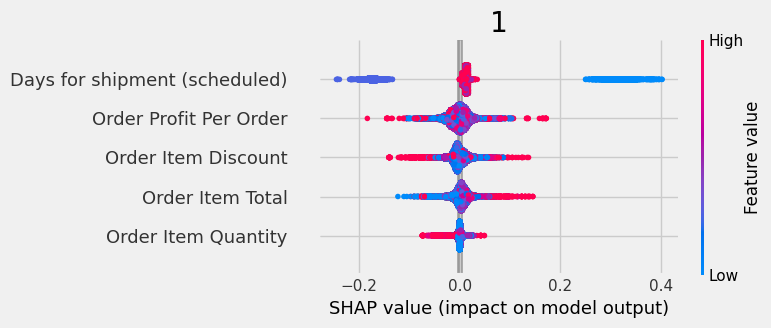


Delay risk for standard shipping class group: 0.3799
Delay risk for non-standard shipping class group: 0.7964
Risk difference: -0.4165


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causalml.inference.meta import XGBTRegressor
import warnings
warnings.filterwarnings('ignore')

# Copy the data
data_casual = data_cleaned.copy()

# Define treatment variable - whether it's standard shipping class
data_casual['is_standard_class'] = (data_casual['Shipping Mode'] == 'Standard Class').astype(int)

# Define potential confounding factors
COMMON_CAUSES = [
    'Days for shipment (scheduled)',
    'Order Item Discount',
    'Order Profit Per Order',
    'Order Item Quantity',
    'Order Item Total'
]

# Define outcome variable
OUTCOME = 'Late_delivery_risk'

# Ensure the outcome variable is numeric
if data_casual[OUTCOME].dtype == 'object':
    data_casual[OUTCOME] = data_casual[OUTCOME].astype(int)

# Split the data
X = data_casual[COMMON_CAUSES]
T = data_casual['is_standard_class']
Y = data_casual[OUTCOME]

print(X.dtypes)
print(T.dtype)
print(Y.dtype)

print("Unique treatment values:", T.unique())
control_value = 0

# Instantiate XGBTRegressor
xgb_regressor = XGBTRegressor(control_name=control_value)

# Estimate the Average Treatment Effect (ATE)
ate = xgb_regressor.estimate_ate(X, T, Y)
print("Estimated Average Treatment Effect (ATE):", ate)

# Fit the model and predict Individual Treatment Effects (ITE)
tau = xgb_regressor.fit_predict(X, T, Y)
print("Estimated individual treatment effects (tau):")
print(tau[:5])  # Only show the first 5 values

# Get the list of feature names
feature_names = X.columns.tolist()

# Visualization 1: Feature Importance (auto method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='auto',
    features=feature_names
)
plt.title('Feature Importance for Individual Treatment Effects')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

# Visualization 2: Feature Importance (permutation method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='permutation',
    features=feature_names
)
plt.title('Feature Importance for Treatment Effects (Permutation Method)')
plt.tight_layout()
plt.savefig('feature_importance_permutation.png')
plt.close()

# Visualization 3: SHAP values
plt.figure(figsize=(12, 8))
xgb_regressor.plot_shap_values(X=X, tau=tau, features=feature_names)
plt.title('SHAP Value Analysis')
plt.tight_layout()
plt.savefig('shap_values.png')
plt.close()

# Visualization 4: Distribution of Individual Treatment Effects
plt.figure(figsize=(10, 6))
plt.hist(tau, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Individual Treatment Effects (ITE) - XGBTRegressor')
plt.xlabel('Treatment Effect (τ)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('ite_distribution.png')
plt.close()

# Visualization 5: Relationship Between Features and Treatment Effects
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:min(6, len(feature_names))]):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], tau, alpha=0.5)
    plt.title(f'{feature} vs Treatment Effect')
    plt.xlabel(feature)
    plt.ylabel('Treatment Effect (τ)')
plt.tight_layout()
plt.savefig('feature_vs_effect.png')
plt.close()

# Visualization 6: Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.close()

# Examine the difference in delay risk between treatment and control groups
treatment_group_risk = data_casual[data_casual['is_standard_class'] == 1][OUTCOME].mean()
control_group_risk = data_casual[data_casual['is_standard_class'] == 0][OUTCOME].mean()
print(f"\nDelay risk for standard shipping class group: {treatment_group_risk:.4f}")
print(f"Delay risk for non-standard shipping class group: {control_group_risk:.4f}")
print(f"Risk difference: {treatment_group_risk - control_group_risk:.4f}")




Showing Distribution of Individual Treatment Effects


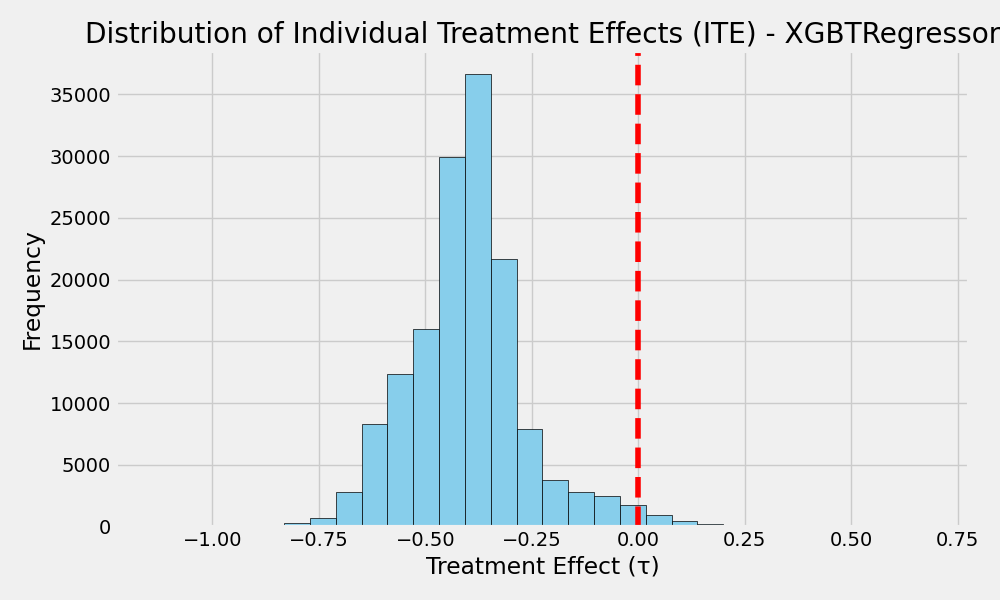

Showing Feature Importance


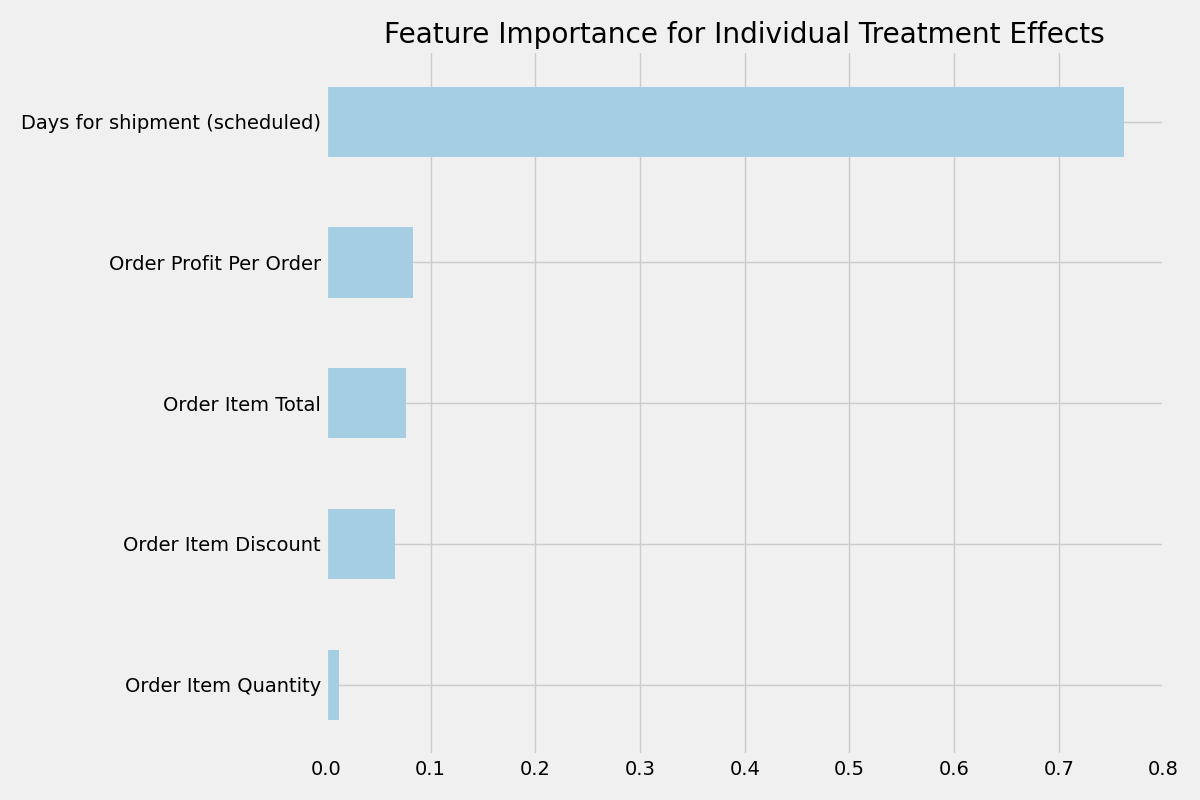

Showing Feature vs Treatment Effect Relationship


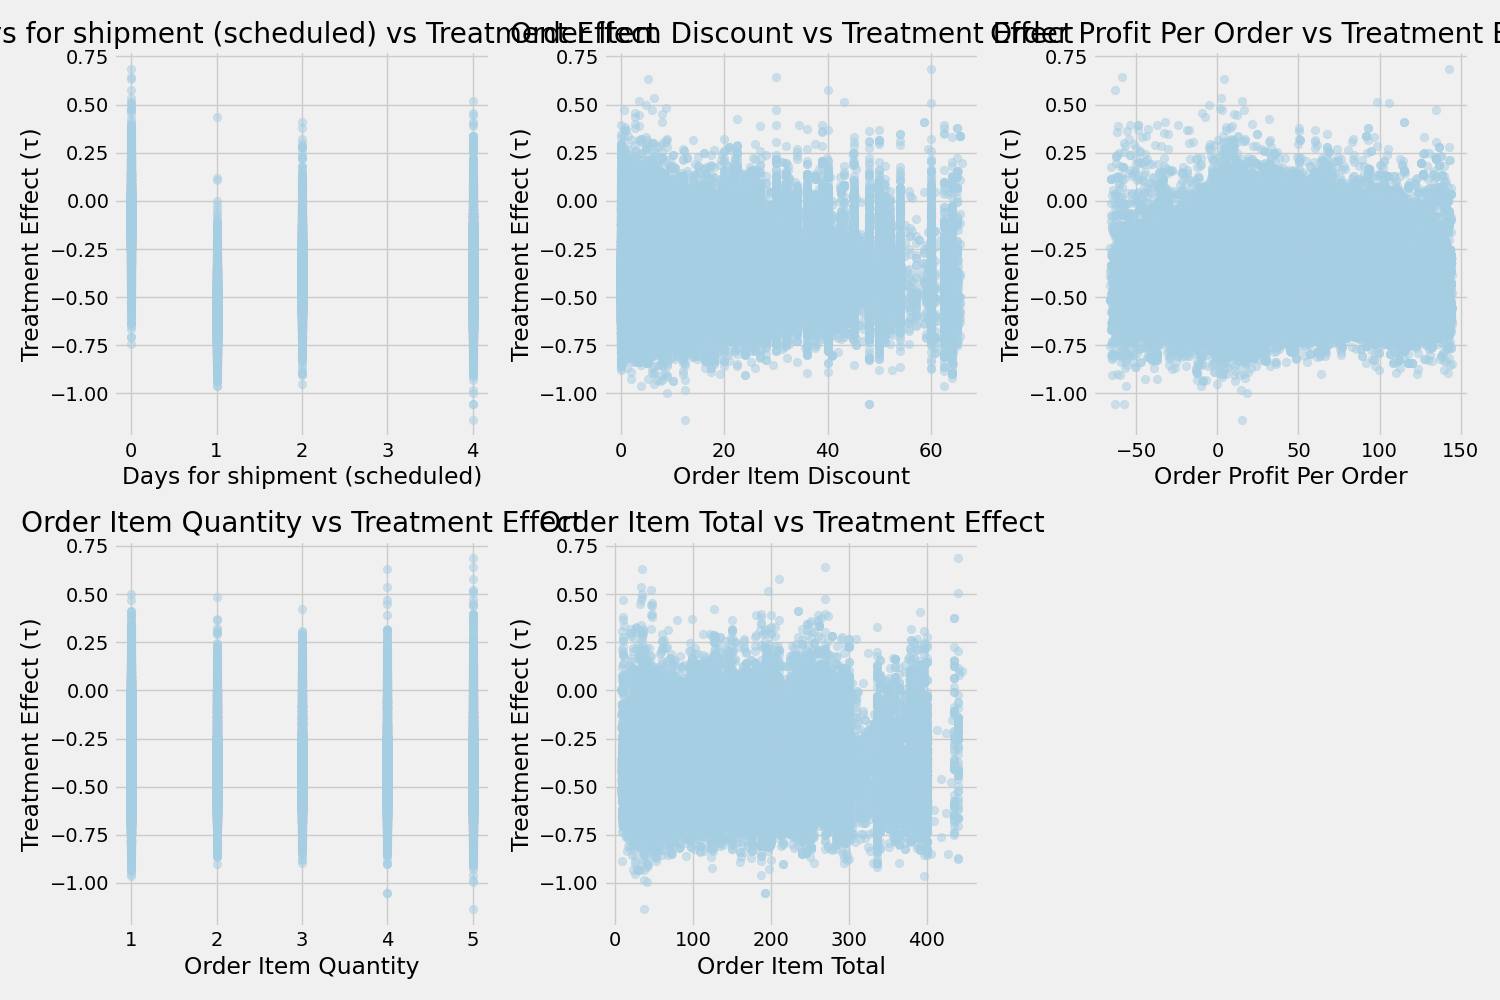

Showing Feature Correlation Heatmap


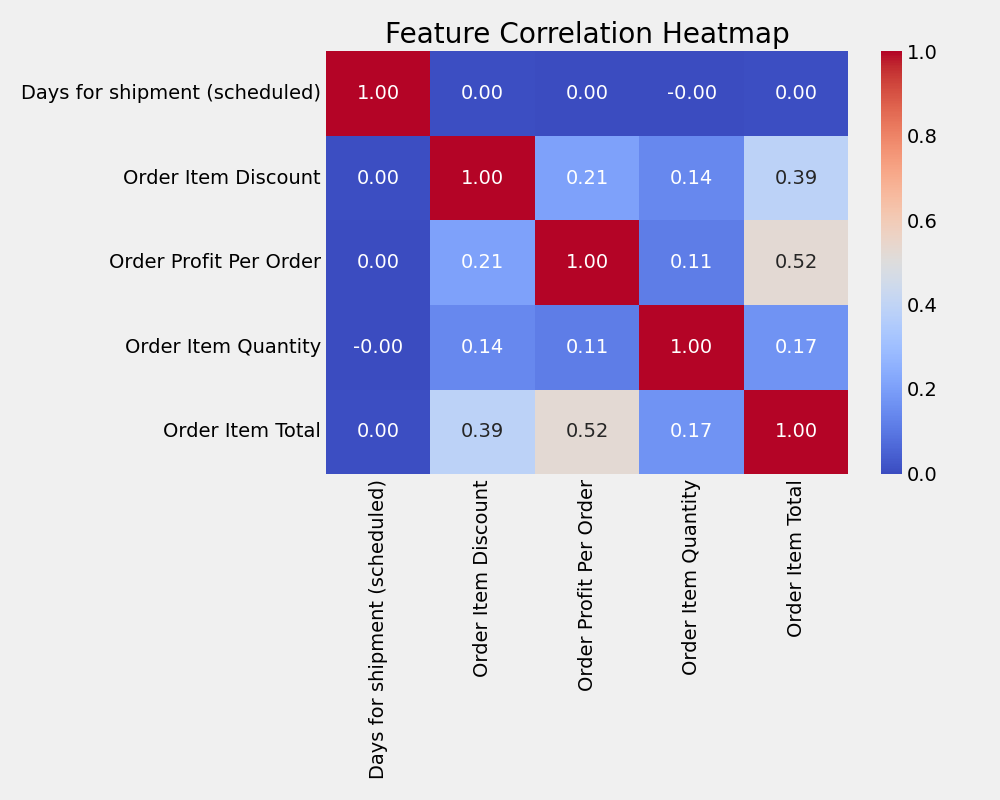

Showing Feature Importance (Permutation Method)


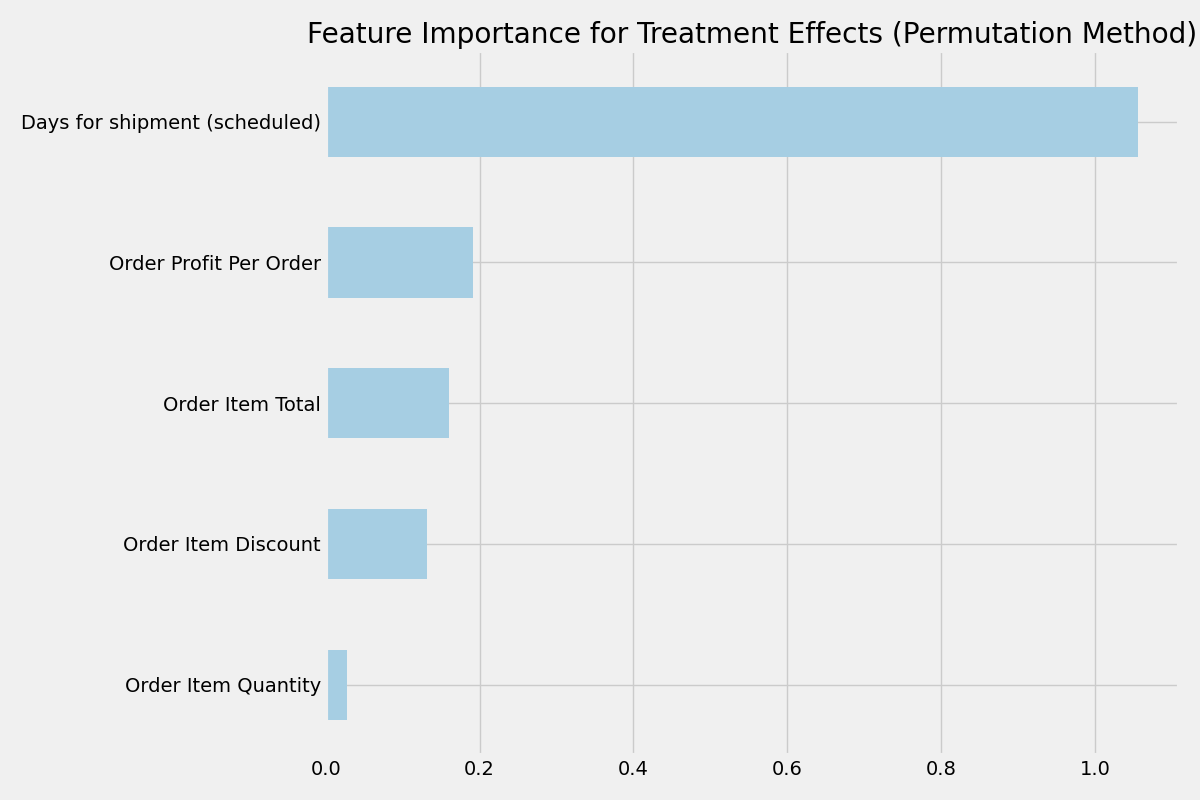

In [44]:
# Display all generated images
from IPython.display import Image, display

print("Showing Distribution of Individual Treatment Effects")
display(Image('ite_distribution.png'))

print("Showing Feature Importance")
display(Image('feature_importance.png'))

print("Showing Feature vs Treatment Effect Relationship")
display(Image('feature_vs_effect.png'))

print("Showing Feature Correlation Heatmap")
display(Image('feature_correlation.png'))

print("Showing Feature Importance (Permutation Method)")
display(Image('feature_importance_permutation.png'))


##### Hypothesis 2: Does the payment type affects late delivery risk because of differences in order processing time?

Days for shipment (scheduled)      int64
Order Item Discount              float64
Order Profit Per Order           float64
Order Item Quantity                int64
Order Item Total                 float64
dtype: object
int64
int64
Unique treatment values: [1 0]
Estimated Average Treatment Effect (ATE): (array([0.03890705]), array([0.03449985]), array([0.04331425]))
Estimated individual treatment effects (tau):
[[ 0.05240455]
 [-0.02629444]
 [ 0.3612546 ]
 [ 0.27681661]
 [ 0.11497879]]
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warn

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

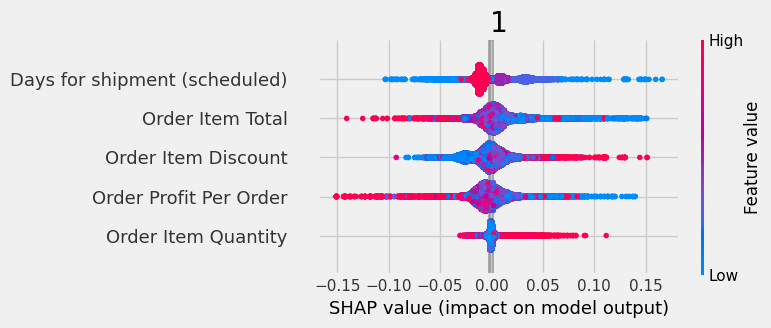


Delay risk for DEBIT payment type: 0.5724
Delay risk for other payment types: 0.5324
Risk difference: 0.0400

Average shipping days for DEBIT payment: 3.49
Average shipping days for other payment types: 3.50
Difference in shipping days: -0.01
Showing Distribution of Individual Treatment Effects


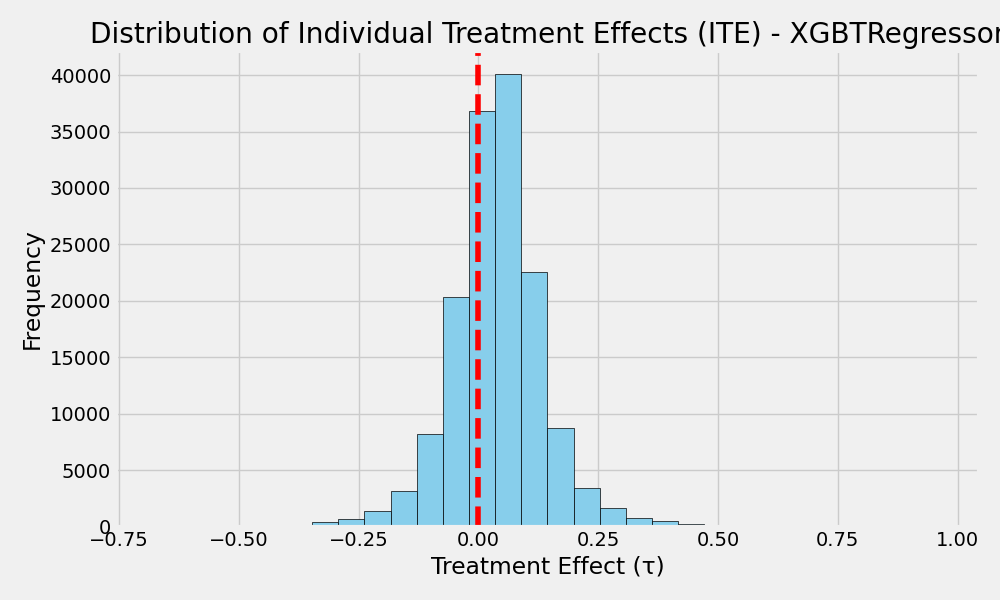

Showing Feature Importance


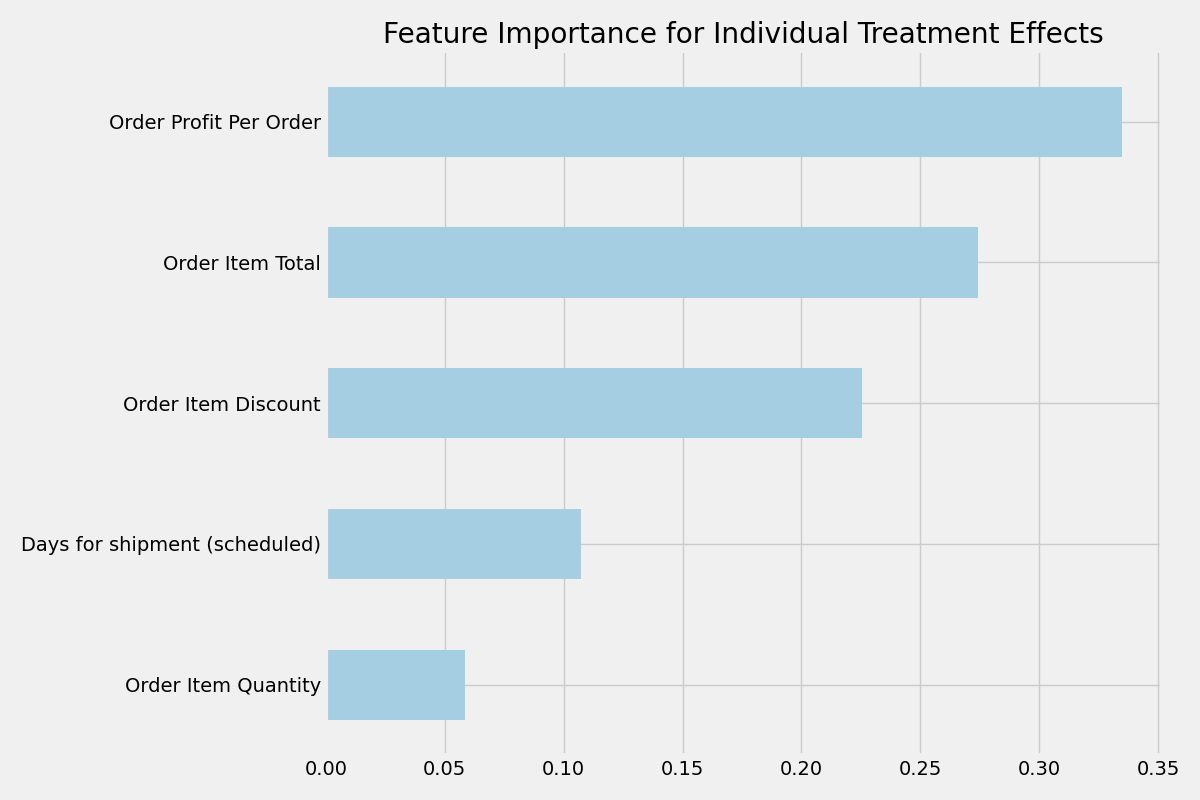

Showing Feature vs Treatment Effect Relationship


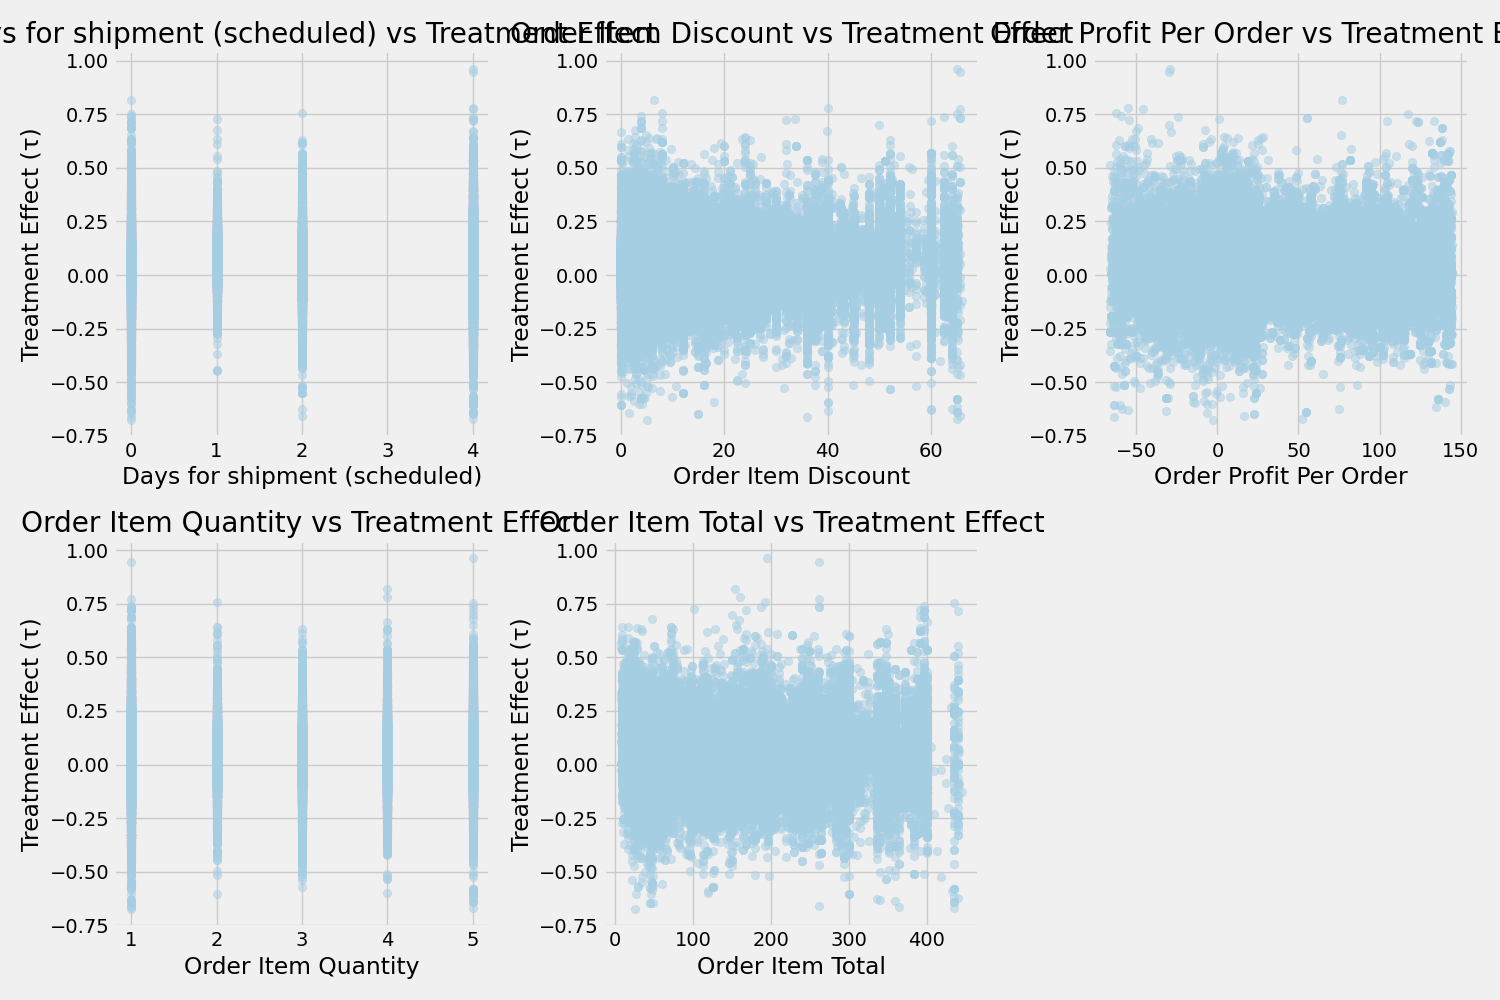

Showing Feature Correlation Heatmap


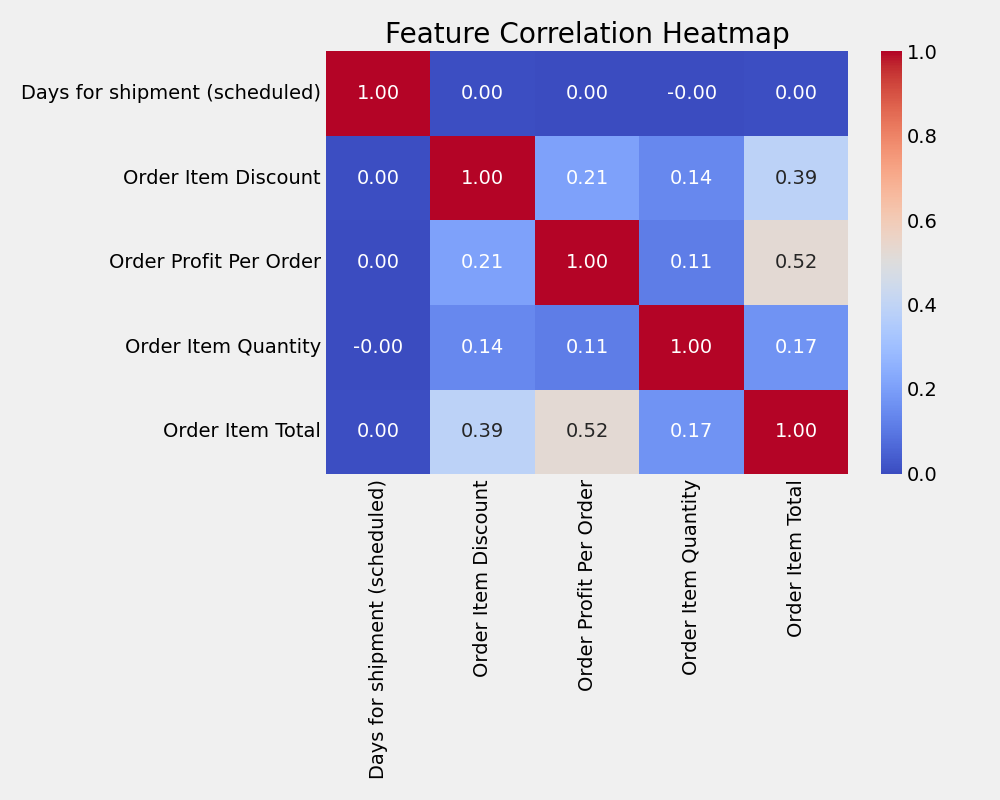

Showing Feature Importance (Permutation Method)


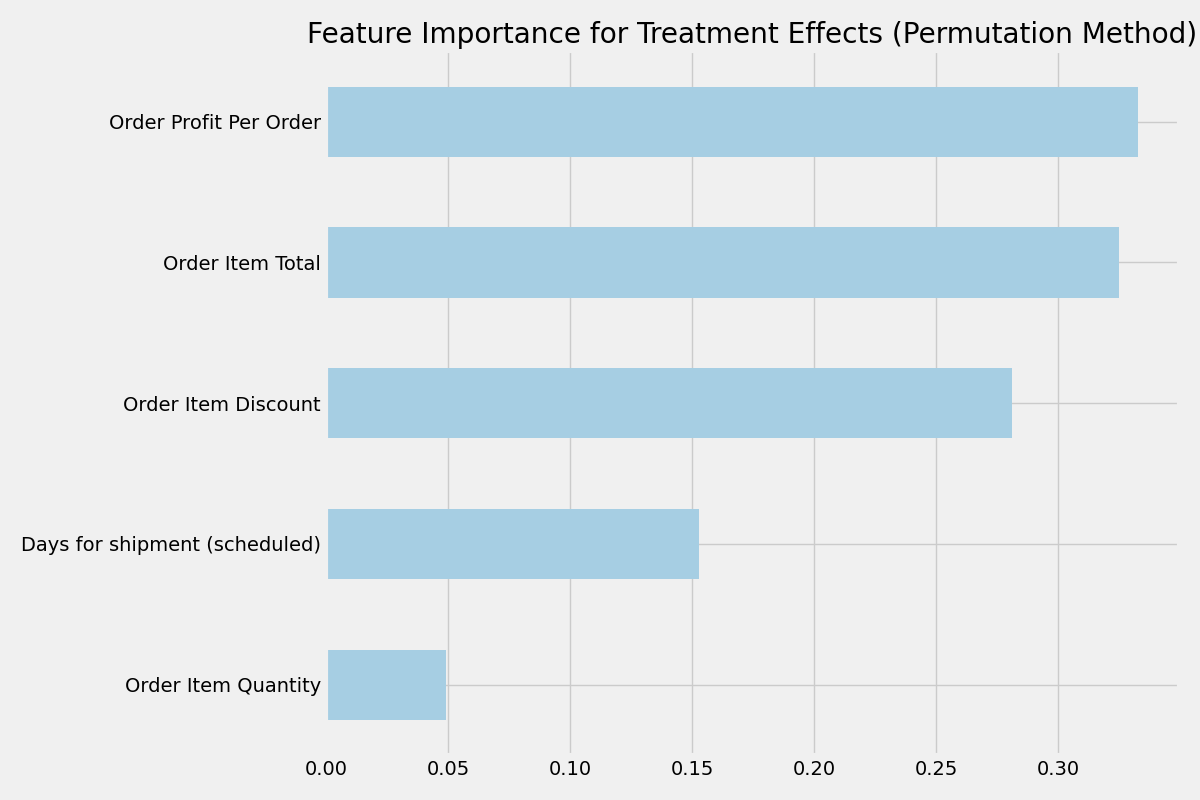

Showing Shipping Days by Payment Type


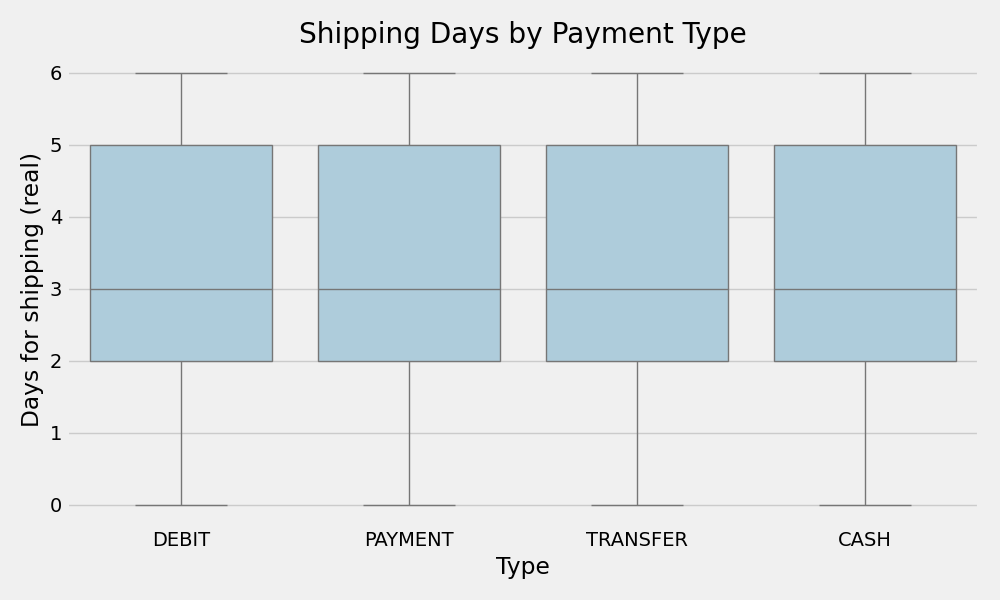

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causalml.inference.meta import XGBTRegressor
import warnings
warnings.filterwarnings('ignore')

# Copy the data
data_casual = data_cleaned.copy()

# Define treatment variable - payment type (focusing on DEBIT vs others)
data_casual['is_debit_payment'] = (data_casual['Type'] == 'DEBIT').astype(int)

# Define potential confounding factors
COMMON_CAUSES = [
    'Days for shipment (scheduled)',
    'Order Item Discount',
    'Order Profit Per Order',
    'Order Item Quantity',
    'Order Item Total'
]

# Define outcome variable
OUTCOME = 'Late_delivery_risk'

# Ensure the outcome variable is numeric
if data_casual[OUTCOME].dtype == 'object':
    data_casual[OUTCOME] = data_casual[OUTCOME].astype(int)

# Split the data
X = data_casual[COMMON_CAUSES]
T = data_casual['is_debit_payment']
Y = data_casual[OUTCOME]

print(X.dtypes)
print(T.dtype)
print(Y.dtype)

print("Unique treatment values:", T.unique())
control_value = 0

# Instantiate XGBTRegressor
xgb_regressor = XGBTRegressor(control_name=control_value)

# Estimate the Average Treatment Effect (ATE)
ate = xgb_regressor.estimate_ate(X, T, Y)
print("Estimated Average Treatment Effect (ATE):", ate)

# Fit the model and predict Individual Treatment Effects (ITE)
tau = xgb_regressor.fit_predict(X, T, Y)
print("Estimated individual treatment effects (tau):")
print(tau[:5])  # Only show the first 5 values

# Get the list of feature names
feature_names = X.columns.tolist()

# Visualization 1: Feature Importance (auto method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='auto',
    features=feature_names
)
plt.title('Feature Importance for Individual Treatment Effects')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

# Visualization 2: Feature Importance (permutation method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='permutation',
    features=feature_names
)
plt.title('Feature Importance for Treatment Effects (Permutation Method)')
plt.tight_layout()
plt.savefig('feature_importance_permutation.png')
plt.close()

# Visualization 3: SHAP values
plt.figure(figsize=(12, 8))
xgb_regressor.plot_shap_values(X=X, tau=tau, features=feature_names)
plt.title('SHAP Value Analysis')
plt.tight_layout()
plt.savefig('shap_values.png')
plt.close()

# Visualization 4: Distribution of Individual Treatment Effects
plt.figure(figsize=(10, 6))
plt.hist(tau, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Individual Treatment Effects (ITE) - XGBTRegressor')
plt.xlabel('Treatment Effect (τ)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('ite_distribution.png')
plt.close()

# Visualization 5: Relationship Between Features and Treatment Effects
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:min(6, len(feature_names))]):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], tau, alpha=0.5)
    plt.title(f'{feature} vs Treatment Effect')
    plt.xlabel(feature)
    plt.ylabel('Treatment Effect (τ)')
plt.tight_layout()
plt.savefig('feature_vs_effect.png')
plt.close()

# Visualization 6: Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.close()

# Visualization 7: Compare shipping days by payment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Days for shipping (real)', data=data_casual)
plt.title('Shipping Days by Payment Type')
plt.tight_layout()
plt.savefig('shipping_days_by_payment.png')
plt.close()

# Examine the difference in delay risk between treatment and control groups
treatment_group_risk = data_casual[data_casual['is_debit_payment'] == 1][OUTCOME].mean()
control_group_risk = data_casual[data_casual['is_debit_payment'] == 0][OUTCOME].mean()
print(f"\nDelay risk for DEBIT payment type: {treatment_group_risk:.4f}")
print(f"Delay risk for other payment types: {control_group_risk:.4f}")
print(f"Risk difference: {treatment_group_risk - control_group_risk:.4f}")


# Calculate average shipping days by payment type
debit_shipping_days = data_casual[data_casual['is_debit_payment'] == 1]['Days for shipping (real)'].mean()
other_shipping_days = data_casual[data_casual['is_debit_payment'] == 0]['Days for shipping (real)'].mean()
print(f"\nAverage shipping days for DEBIT payment: {debit_shipping_days:.2f}")
print(f"Average shipping days for other payment types: {other_shipping_days:.2f}")
print(f"Difference in shipping days: {debit_shipping_days - other_shipping_days:.2f}")

# Display all generated images
from IPython.display import Image, display

print("Showing Distribution of Individual Treatment Effects")
display(Image('ite_distribution.png'))

print("Showing Feature Importance")
display(Image('feature_importance.png'))

print("Showing Feature vs Treatment Effect Relationship")
display(Image('feature_vs_effect.png'))

print("Showing Feature Correlation Heatmap")
display(Image('feature_correlation.png'))

print("Showing Feature Importance (Permutation Method)")
display(Image('feature_importance_permutation.png'))

print("Showing Shipping Days by Payment Type")
display(Image('shipping_days_by_payment.png'))

##### Hypothesis 3: Are orders from certain regions are causally more likely to experience late delivery due to logistical or infrastructural constraints?

Days for shipment (scheduled)      int64
Order Item Discount              float64
Order Profit Per Order           float64
Order Item Quantity                int64
Order Item Total                 float64
dtype: object
int64
int64
Unique treatment values: [0 1]
Estimated Average Treatment Effect (ATE): (array([0.001384]), array([-0.00444725]), array([0.00721524]))
Estimated individual treatment effects (tau):
[[ 0.11347002]
 [-0.06669658]
 [-0.0183515 ]
 [ 0.11215672]
 [-0.17921704]]
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warni

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

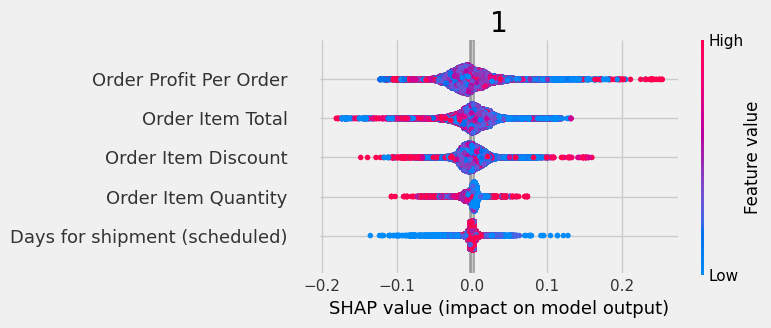


Delay risk for Southeast Asia region: 0.5507
Delay risk for other regions: 0.5473
Risk difference: 0.0035

Average shipping days for Southeast Asia: 3.49
Average shipping days for other regions: 3.50
Difference in shipping days: -0.01

Regions in the dataset:
Order Region
Central America    23637
Western Europe     21974
South America      12528
Oceania             8367
Northern Europe     7945
Southeast Asia      7805
Southern Europe     7701
Caribbean           6967
West of USA         6655
South Asia          6396
Eastern Asia        5890
East of USA         5764
West Asia           5036
US Center           4963
South of  USA       3417
Eastern Europe      3253
West Africa         3112
North Africa        2717
East Africa         1534
Central Africa      1368
Southern Africa      981
Canada               810
Central Asia         467
Name: count, dtype: int64
Showing Distribution of Individual Treatment Effects


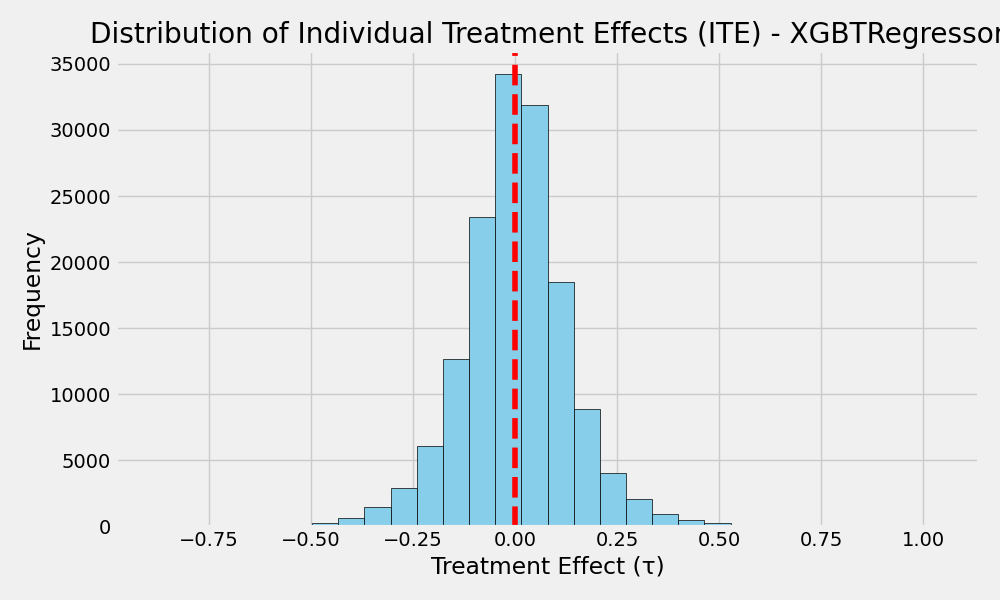

Showing Feature Importance


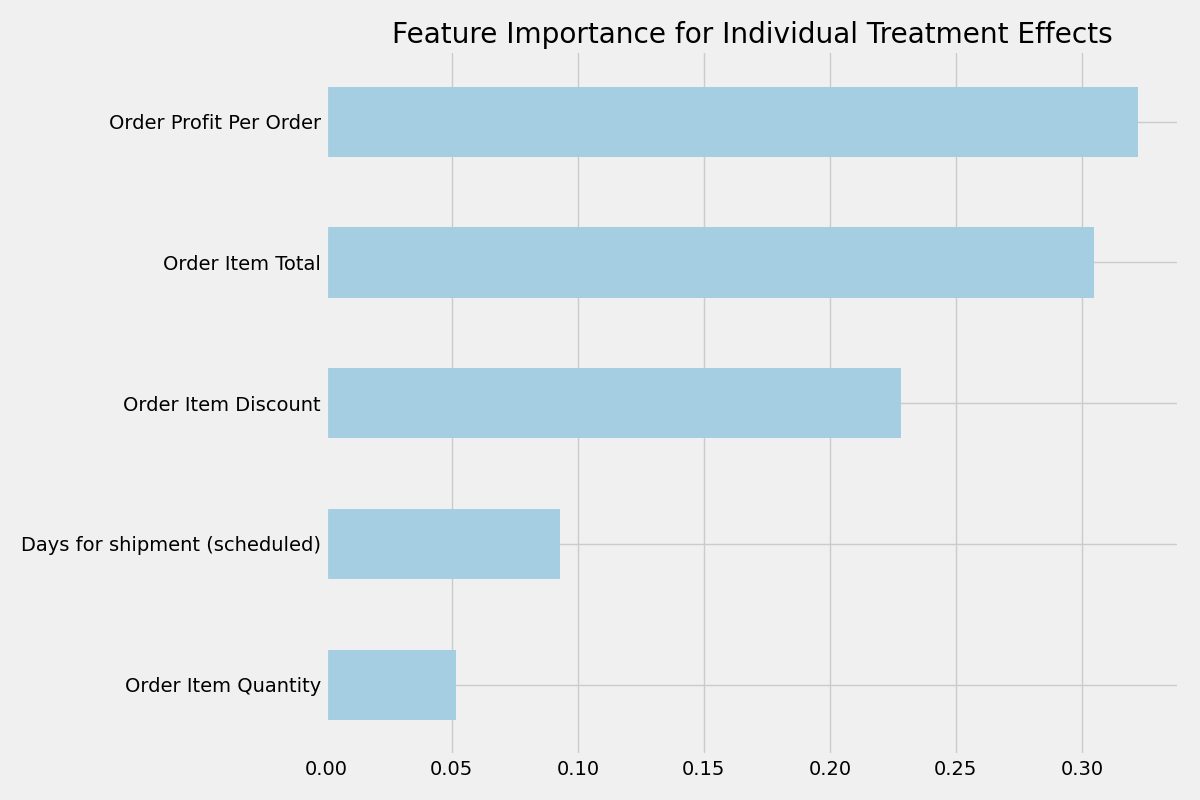

Showing Feature vs Treatment Effect Relationship


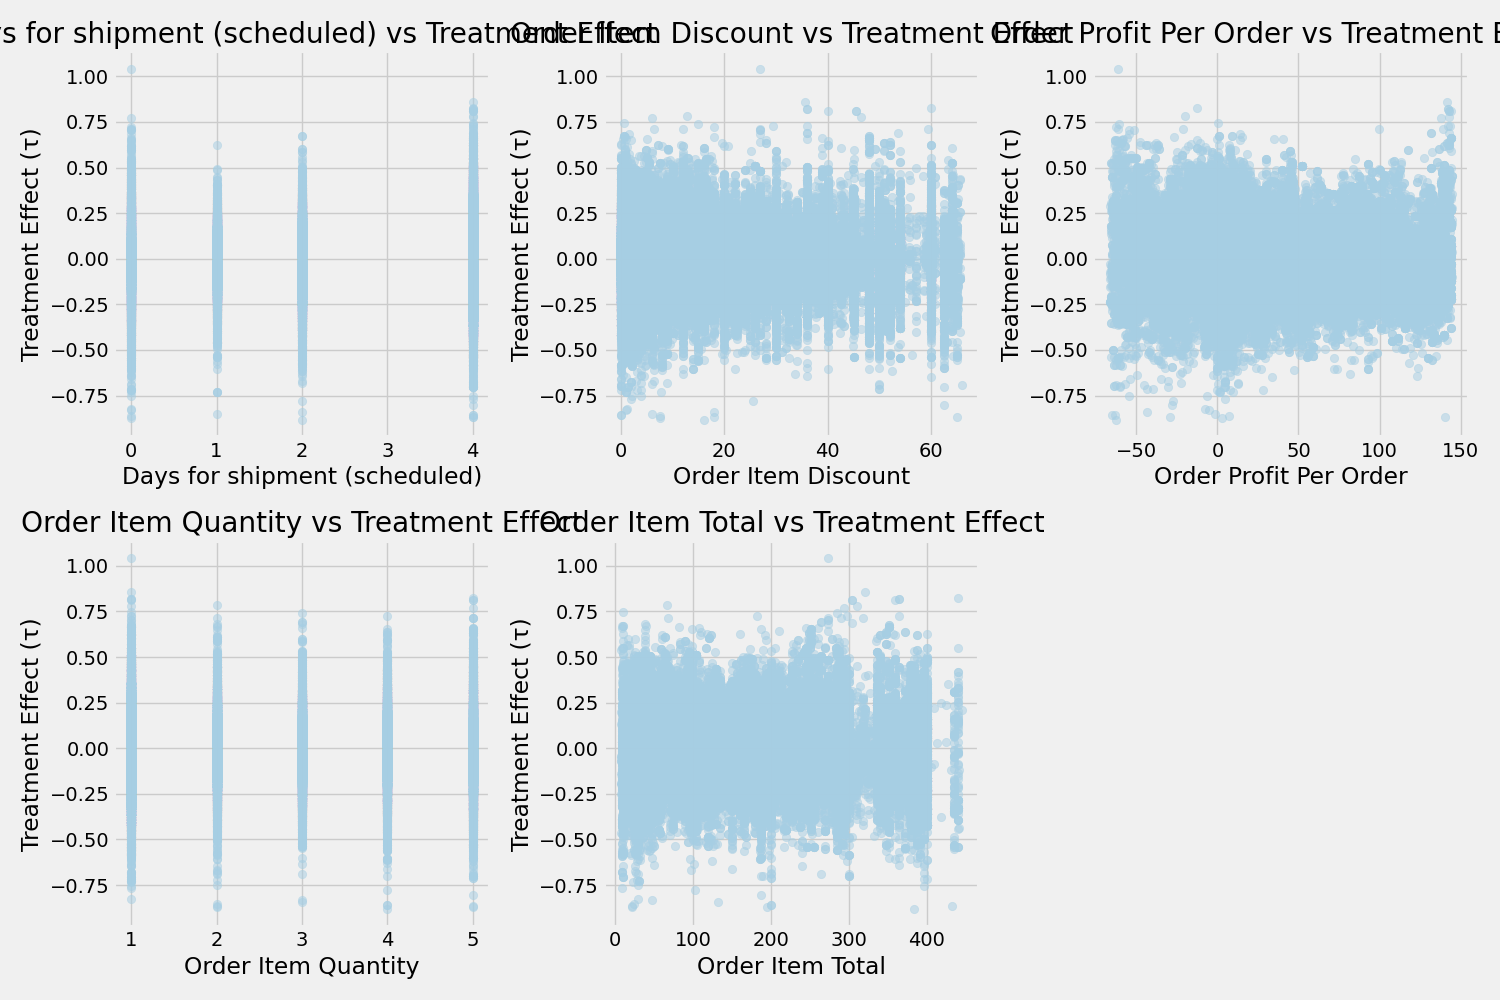

Showing Feature Correlation Heatmap


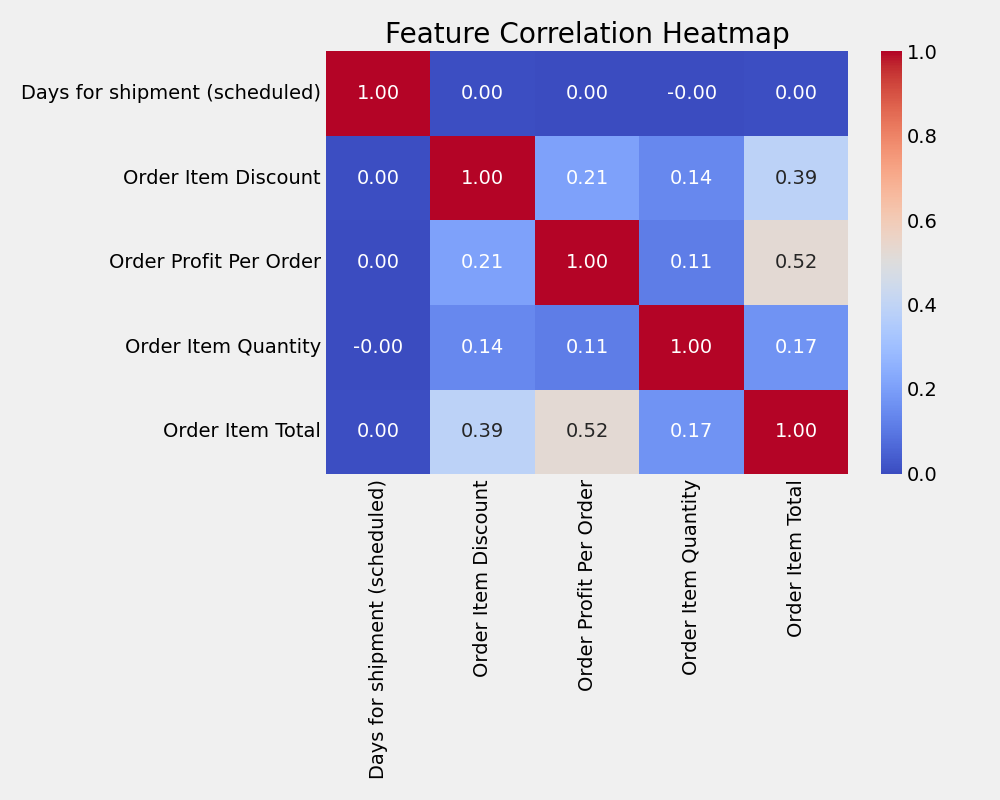

Showing Feature Importance (Permutation Method)


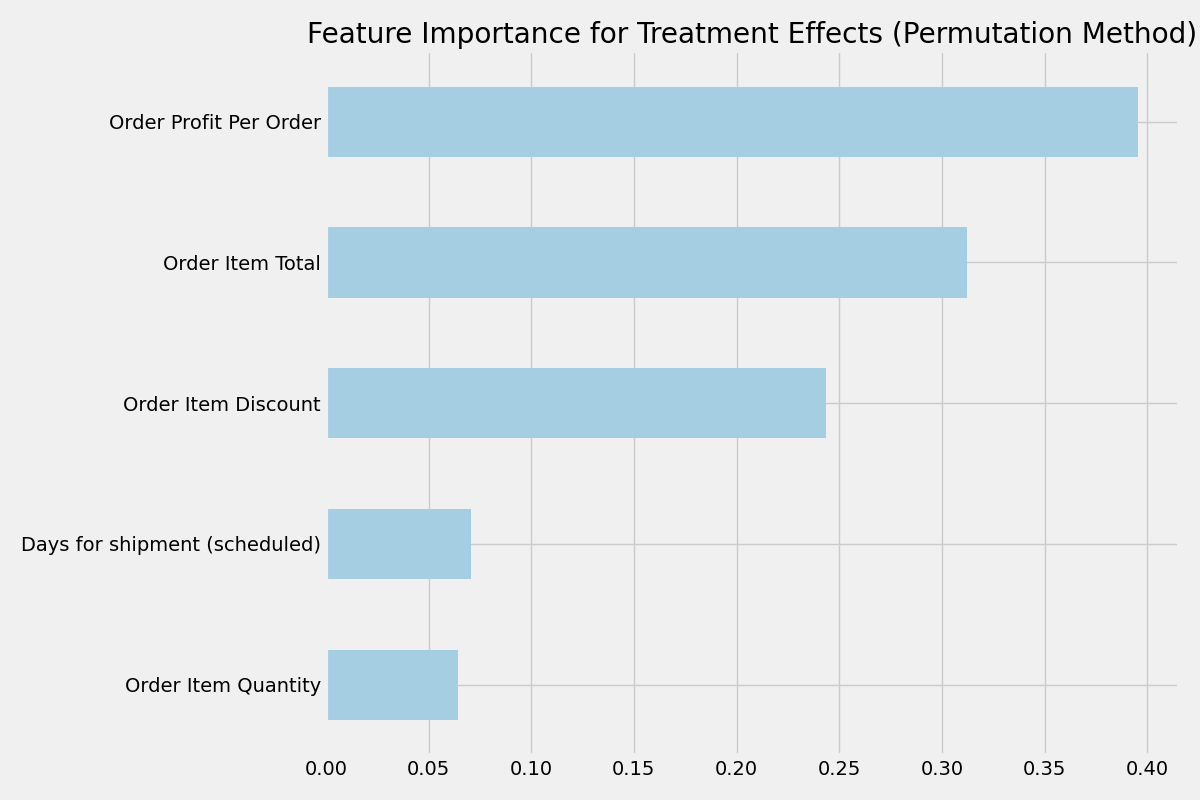

Showing Late Delivery Risk by Region


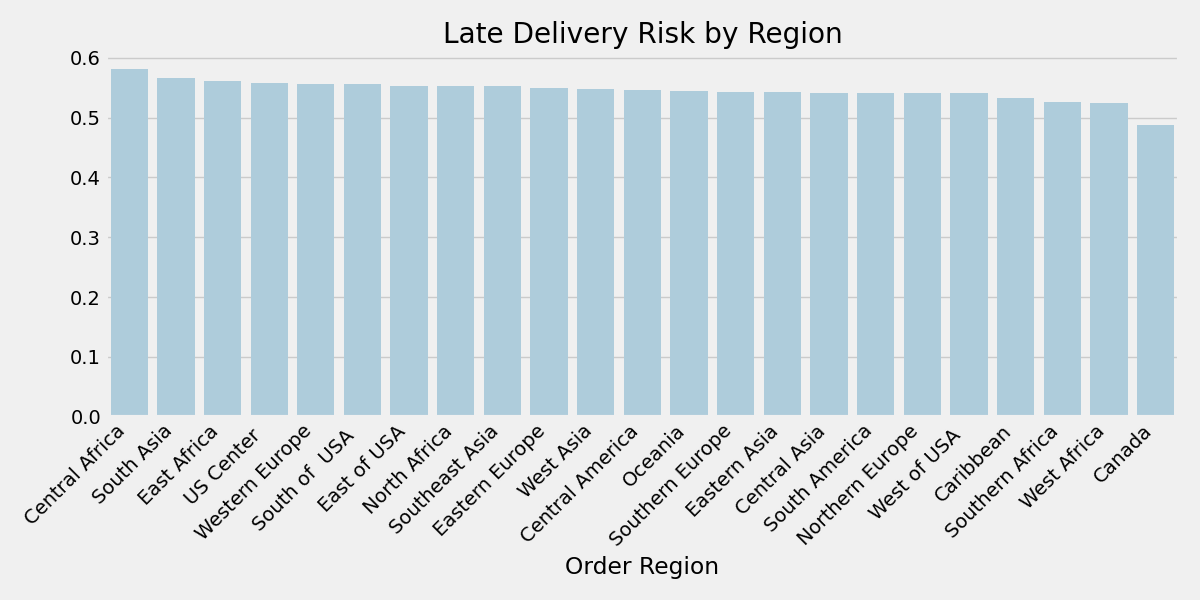

Showing Average Shipping Days by Region


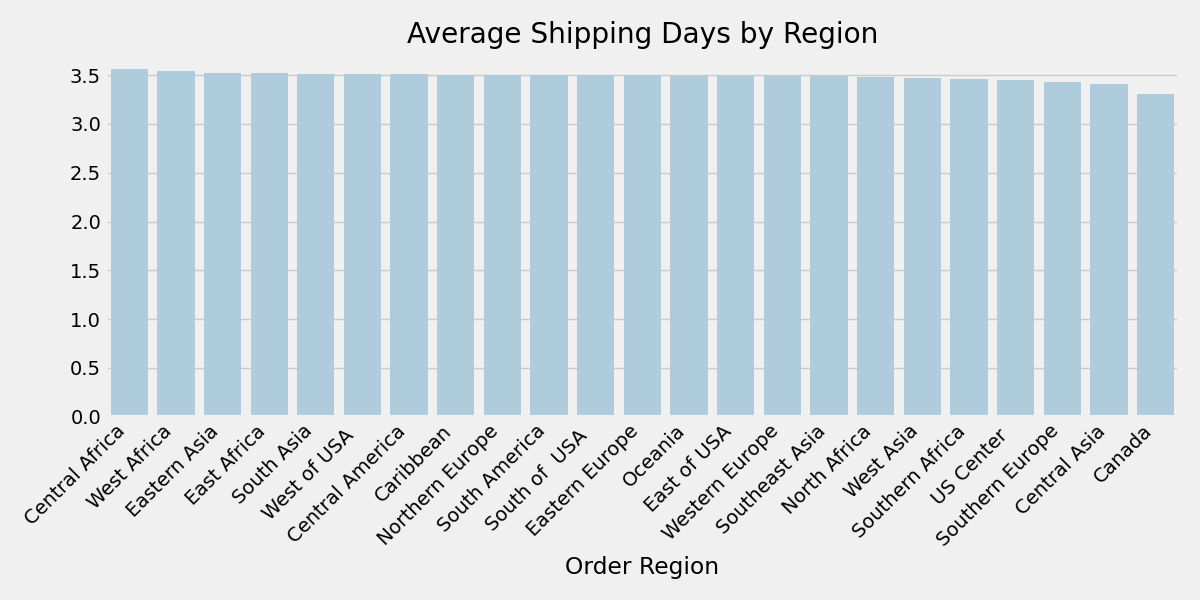

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from causalml.inference.meta import XGBTRegressor
import warnings
warnings.filterwarnings('ignore')

# Copy the data
data_casual = data_cleaned.copy()

# Define treatment variable - focus on orders from a specific region (e.g., Southeast Asia)
data_casual['is_Estados Unidos'] = (data_casual['Order Country'] == 'Estados Unidos').astype(int)

# Define potential confounding factors
COMMON_CAUSES = [
    'Days for shipment (scheduled)',
    'Order Item Discount',
    'Order Profit Per Order',
    'Order Item Quantity',
    'Order Item Total'
]

# Define outcome variable
OUTCOME = 'Late_delivery_risk'

# Ensure the outcome variable is numeric
if data_casual[OUTCOME].dtype == 'object':
    data_casual[OUTCOME] = data_casual[OUTCOME].astype(int)

# Split the data
X = data_casual[COMMON_CAUSES]
T = data_casual['is_Estados Unidos']
Y = data_casual[OUTCOME]

print(X.dtypes)
print(T.dtype)
print(Y.dtype)

print("Unique treatment values:", T.unique())
control_value = 0

# Instantiate XGBTRegressor
xgb_regressor = XGBTRegressor(control_name=control_value)

# Estimate the Average Treatment Effect (ATE)
ate = xgb_regressor.estimate_ate(X, T, Y)
print("Estimated Average Treatment Effect (ATE):", ate)

# Fit the model and predict Individual Treatment Effects (ITE)
tau = xgb_regressor.fit_predict(X, T, Y)
print("Estimated individual treatment effects (tau):")
print(tau[:5])  # Only show the first 5 values

# Get the list of feature names
feature_names = X.columns.tolist()

# Visualization 1: Feature Importance (auto method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='auto',
    features=feature_names
)
plt.title('Feature Importance for Individual Treatment Effects')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

# Visualization 2: Feature Importance (permutation method)
plt.figure(figsize=(10, 6))
xgb_regressor.plot_importance(
    X=X,
    tau=tau,
    normalize=True,
    method='permutation',
    features=feature_names
)
plt.title('Feature Importance for Treatment Effects (Permutation Method)')
plt.tight_layout()
plt.savefig('feature_importance_permutation.png')
plt.close()

# Visualization 3: SHAP values
plt.figure(figsize=(12, 8))
xgb_regressor.plot_shap_values(X=X, tau=tau, features=feature_names)
plt.title('SHAP Value Analysis')
plt.tight_layout()
plt.savefig('shap_values.png')
plt.close()

# Visualization 4: Distribution of Individual Treatment Effects
plt.figure(figsize=(10, 6))
plt.hist(tau, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Individual Treatment Effects (ITE) - XGBTRegressor')
plt.xlabel('Treatment Effect (τ)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('ite_distribution.png')
plt.close()

# Visualization 5: Relationship Between Features and Treatment Effects
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:min(6, len(feature_names))]):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[feature], tau, alpha=0.5)
    plt.title(f'{feature} vs Treatment Effect')
    plt.xlabel(feature)
    plt.ylabel('Treatment Effect (τ)')
plt.tight_layout()
plt.savefig('feature_vs_effect.png')
plt.close()

# Visualization 6: Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.close()

# Visualization 7: Late delivery risk by region
plt.figure(figsize=(12, 6))
region_risk = data_casual.groupby('Order Region')[OUTCOME].mean().sort_values(ascending=False)
sns.barplot(x=region_risk.index, y=region_risk.values)
plt.title('Late Delivery Risk by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('region_delivery_risk.png')
plt.close()

# Visualization 8: Shipping days by region
plt.figure(figsize=(12, 6))
shipping_days = data_casual.groupby('Order Region')['Days for shipping (real)'].mean().sort_values(ascending=False)
sns.barplot(x=shipping_days.index, y=shipping_days.values)
plt.title('Average Shipping Days by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('region_shipping_days.png')
plt.close()

# Examine the difference in delay risk between treatment and control groups
treatment_group_risk = data_casual[data_casual['is_Estados Unidos'] == 1][OUTCOME].mean()
control_group_risk = data_casual[data_casual['is_Estados Unidos'] == 0][OUTCOME].mean()
print(f"\nDelay risk for Southeast Asia region: {treatment_group_risk:.4f}")
print(f"Delay risk for other regions: {control_group_risk:.4f}")
print(f"Risk difference: {treatment_group_risk - control_group_risk:.4f}")


# Calculate average shipping days by region
sea_shipping_days = data_casual[data_casual['is_Estados Unidos'] == 1]['Days for shipping (real)'].mean()
other_shipping_days = data_casual[data_casual['is_Estados Unidos'] == 0]['Days for shipping (real)'].mean()
print(f"\nAverage shipping days for Southeast Asia: {sea_shipping_days:.2f}")
print(f"Average shipping days for other regions: {other_shipping_days:.2f}")
print(f"Difference in shipping days: {sea_shipping_days - other_shipping_days:.2f}")

# Display regions in the dataset
print("\nRegions in the dataset:")
print(data_casual['Order Region'].value_counts())

# Display all generated images
from IPython.display import Image, display

print("Showing Distribution of Individual Treatment Effects")
display(Image('ite_distribution.png'))

print("Showing Feature Importance")
display(Image('feature_importance.png'))

print("Showing Feature vs Treatment Effect Relationship")
display(Image('feature_vs_effect.png'))

print("Showing Feature Correlation Heatmap")
display(Image('feature_correlation.png'))

print("Showing Feature Importance (Permutation Method)")
display(Image('feature_importance_permutation.png'))


print("Showing Late Delivery Risk by Region")
display(Image('region_delivery_risk.png'))

print("Showing Average Shipping Days by Region")
display(Image('region_shipping_days.png'))